In [1]:
import logread

import matplotlib.pyplot as plt
import numpy as np

import astropy
import astropy.units as us
from astropy.io import fits

import warnings
warnings.filterwarnings("ignore")


# Crab Revolutions where spimodfit run successful

In [2]:
rev = [43,44,45,47,51,55,58,102,123,124,125,126,177,181,182,225,229,239,242,300,301,308,352,365,372,412,420,422,428,464,468,483,541,605,662, 665,666,727,728,774,834,835,836,839,902,903,917,966,967,968,970,1019,1021,1022,1023,1024,1026,1027,1028,1089,1096,1140,1141,1214,1221,1268,1269,1278,1327,1328,1342,1387,1444,1447,1456,1461,1462,1466,1468,1504,1505,1515,1516,1520,1524,1528,1577,1581,1593,1597,1598,1599,1644,1648,1658,1662,1664,1667,1719,1723,1724,1728,1733,1736,1781,1784,1785,1789,1794,1797,1801,1850,1856,1857,1866,1867,1877,1921,1925,1927,1928,1930,1943,1987,1991,1996,1999,2000,2010]



In [3]:
good_rev = []
bad_rev = []

# Read spimodfit.logs and add to array

In [4]:
def get_bad_rev(rev):
    smf = logread.Log('../fit_Crab_SE_02_0-5Bin_rev' +str(rev) + '/spimodfit.log')
    #smf.info()
    Chi_sq = smf.parameters['Reduced Pear. Chi sq. at opt.']
    BinC = smf.parameters['Bin center']
    dof = smf.parameters['Number of degrees of freedom']
    print('Dof ',dof)
    width = np.sqrt(2/dof) #standard deviation in sigma
    print('Width ', width)
    
    get_ipython().run_line_magic('matplotlib', 'inline')
    
    plt.figure(figsize = (8,8))
    plt.style.use('default')
    plt.title('Revolution ' + str(rev), weight = 'bold')
    plt.plot(BinC, Chi_sq, color = 'blue')
    plt.xlabel('Energy [keV]')
    plt.ylabel('Reduced Pear. Chi sq. at opt.')
    plt.axhline(1+3*width[0], color = 'black', linestyle = '--') # 3 sigma
    plt.show()
    
    bad_bins = BinC[np.where(Chi_sq > (1+3*width))]
    print('Bad Bins ',bad_bins)
    count = len(bad_bins)
    print('Count ',count)
    tolerance = 0.09 * len(BinC) #9% der Bins außerhalb 3 sigma
    print('Tolerance ',tolerance)
    if count <= tolerance:
        good_rev.append(rev)
    else:
        bad_rev.append(rev)


Dof  [1082. 1082. 1082. ... 1082. 1082. 1082.]
Width  [0.04299336 0.04299336 0.04299336 ... 0.04299336 0.04299336 0.04299336]


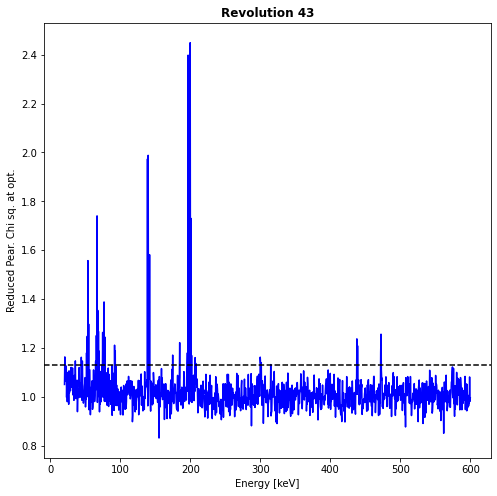

Bad Bins  [ 20.75  35.75  44.25  45.75  51.75  52.75  53.75  54.75  64.75  65.75
  66.75  67.75  68.75  69.75  73.75  74.75  75.75  76.75  77.75  91.75
  92.75 138.75 139.75 140.75 141.75 174.75 184.75 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 206.75 207.75 299.75 300.25 301.25 314.75
 437.75 438.75 471.75 472.25]
Count  44
Tolerance  104.39999999999999
Dof  [1286. 1286. 1286. ... 1286. 1286. 1286.]
Width  [0.03943615 0.03943615 0.03943615 ... 0.03943615 0.03943615 0.03943615]


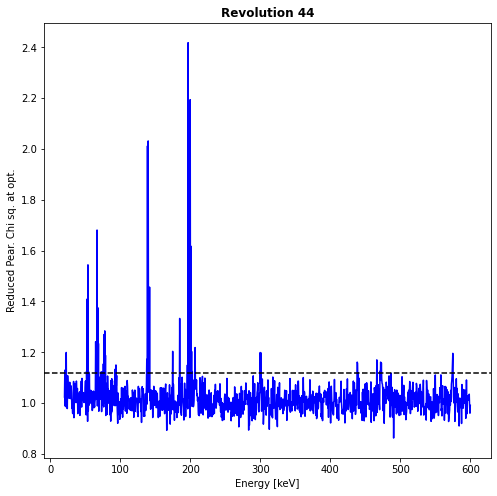

Bad Bins  [ 20.75  22.75  51.75  52.75  53.75  54.75  64.75  65.75  66.75  67.75
  68.75  72.75  74.75  75.75  76.75  77.75  78.75  92.75  93.75 137.75
 138.75 139.75 140.75 141.75 174.75 184.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 202.75 206.75 299.75 300.75 438.25 438.75 439.75
 466.25 470.75 471.75 472.75 574.25 574.75]
Count  46
Tolerance  104.39999999999999
Dof  [1031. 1031. 1031. ... 1031. 1031. 1031.]
Width  [0.04404389 0.04404389 0.04404389 ... 0.04404389 0.04404389 0.04404389]


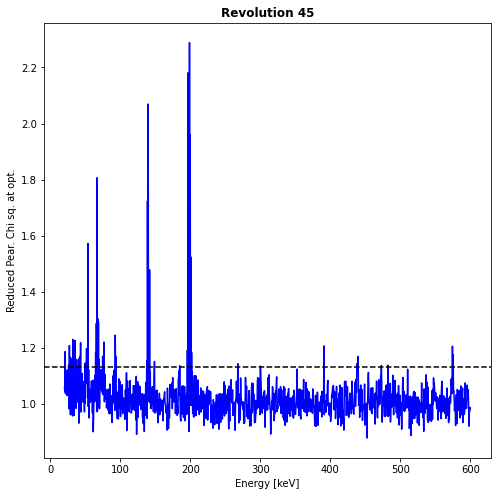

Bad Bins  [ 21.25  26.25  27.25  28.25  30.25  31.25  32.25  33.25  34.25  35.25
  37.25  40.25  42.25  43.25  49.25  50.25  51.75  52.75  53.75  64.75
  65.75  66.75  67.75  68.75  69.75  74.75  76.75  92.75  93.75 137.75
 138.75 139.75 140.75 141.75 148.75 184.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 267.75 299.75 300.25 390.75 437.75 438.25 439.25
 472.75 482.25 574.25 575.25]
Count  54
Tolerance  104.39999999999999
Dof  [31. 31. 31. ... 31. 31. 31.]
Width  [0.25400025 0.25400025 0.25400025 ... 0.25400025 0.25400025 0.25400025]


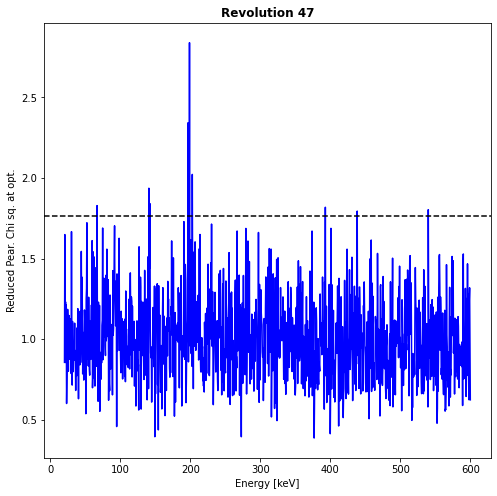

Bad Bins  [ 66.75 140.75 142.25 196.75 198.75 202.75 392.75 438.25 539.75]
Count  9
Tolerance  104.39999999999999
Dof  [31. 31. 31. ... 31. 31. 31.]
Width  [0.25400025 0.25400025 0.25400025 ... 0.25400025 0.25400025 0.25400025]


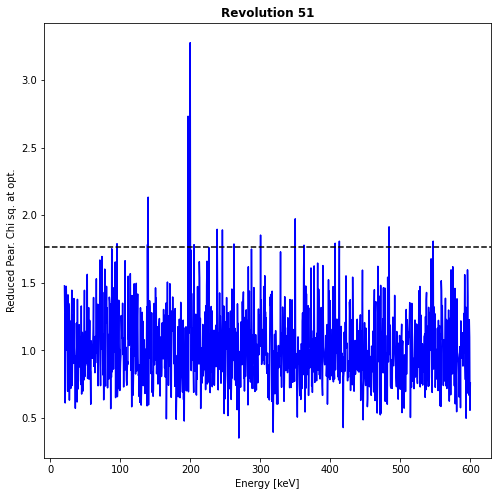

Bad Bins  [ 95.25 138.75 139.75 196.75 198.75 199.75 205.25 238.25 245.75 262.25
 300.25 349.75 362.25 406.75 412.75 483.75 546.75]
Count  17
Tolerance  104.39999999999999
Dof  [14. 14. 14. ... 14. 14. 14.]
Width  [0.37796447 0.37796447 0.37796447 ... 0.37796447 0.37796447 0.37796447]


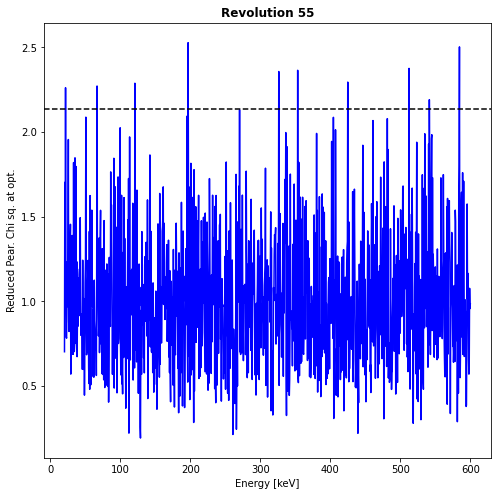

Bad Bins  [ 21.75  66.75 120.75 196.75 326.25 353.25 424.75 512.25 541.25 584.25]
Count  10
Tolerance  104.39999999999999
Dof  [64. 64. 64. ... 64. 64. 64.]
Width  [0.1767767 0.1767767 0.1767767 ... 0.1767767 0.1767767 0.1767767]


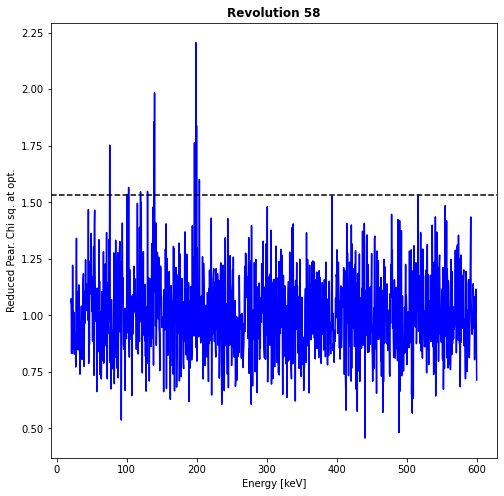

Bad Bins  [ 75.75 100.25 102.75 119.75 129.75 138.75 139.75 196.75 198.75 199.75
 203.75]
Count  11
Tolerance  104.39999999999999
Dof  [402. 402. 402. ... 402. 402. 402.]
Width  [0.07053456 0.07053456 0.07053456 ... 0.07053456 0.07053456 0.07053456]


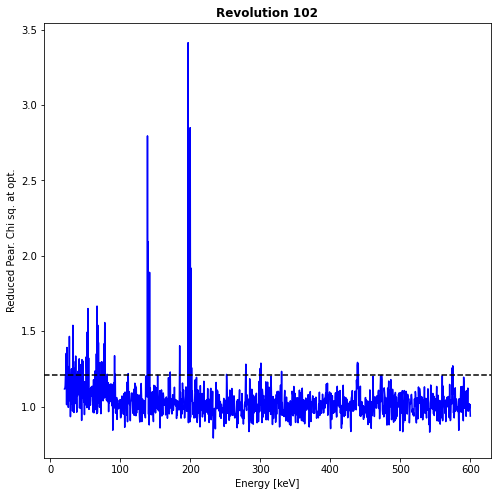

Bad Bins  [ 21.75  22.75  23.75  26.25  27.25  30.25  31.25  32.25  33.25  34.25
  35.25  36.25  38.25  39.25  40.25  41.25  42.25  43.25  44.25  45.25
  46.25  46.75  51.25  51.75  52.75  53.75  54.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  72.75  73.75  74.75  75.75  76.75  77.75
  81.25  91.75  92.75 111.25 138.75 139.75 140.75 141.75 171.25 184.75
 196.75 197.75 198.75 199.75 200.75 201.75 251.75 279.25 299.75 300.75
 330.25 438.25 438.75 439.75 573.75 574.75]
Count  66
Tolerance  104.39999999999999
Dof  [48. 48. 48. ... 48. 48. 48.]
Width  [0.20412415 0.20412415 0.20412415 ... 0.20412415 0.20412415 0.20412415]


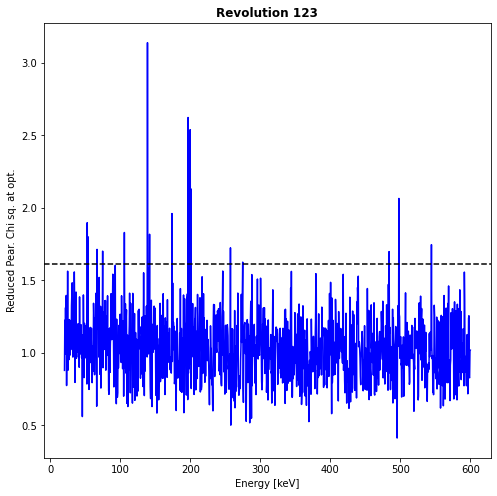

Bad Bins  [ 52.75  53.75  66.75  74.75 105.75 138.75 141.75 173.75 196.75 197.75
 198.75 199.75 200.75 257.25 274.75 483.75 497.75 544.25]
Count  18
Tolerance  104.39999999999999
Dof  [592. 592. 592. ... 592. 592. 592.]
Width  [0.05812382 0.05812382 0.05812382 ... 0.05812382 0.05812382 0.05812382]


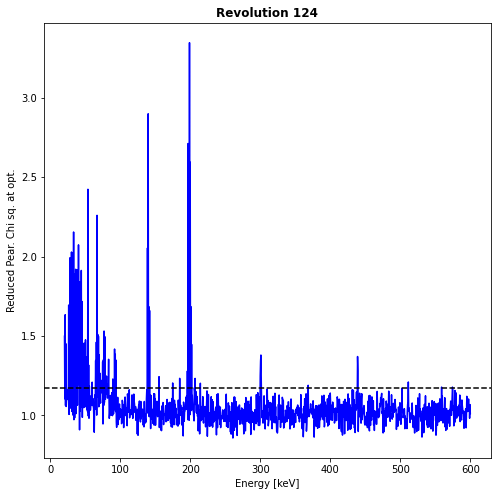

Bad Bins  [ 20.25  21.25  22.25  26.25  27.25  28.25  29.25  30.25  31.25  32.25
  33.25  34.25  35.25  36.25  37.25  38.25  39.25  39.75  40.25  40.75
  41.25  42.25  43.25  44.25  45.25  46.25  47.25  48.25  49.25  50.25
  51.75  52.75  53.75  54.75  55.75  59.75  64.75  65.75  66.75  67.75
  68.75  69.75  70.75  72.25  72.75  73.25  74.75  75.75  76.75  77.75
  79.75  80.25  81.25  82.75  83.25  89.25  91.75  92.75  93.75 138.75
 139.75 140.75 141.75 155.25 174.75 184.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 206.75 214.25 299.75 300.25 300.75 301.25 368.25
 438.75 439.25 511.25 558.75 574.25]
Count  85
Tolerance  104.39999999999999
Dof  [31. 31. 31. ... 31. 31. 31.]
Width  [0.25400025 0.25400025 0.25400025 ... 0.25400025 0.25400025 0.25400025]


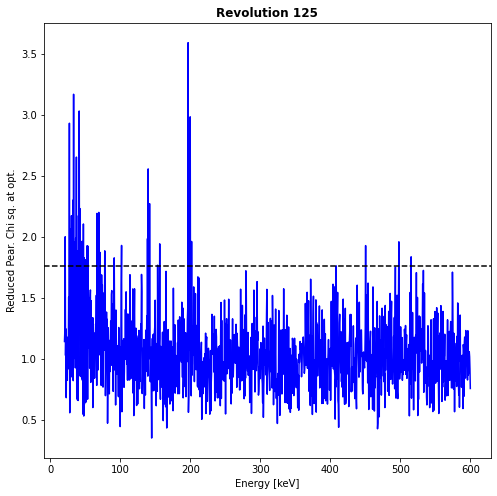

Bad Bins  [ 21.25  27.25  28.25  29.25  30.25  31.25  32.25  33.25  34.25  35.25
  36.25  37.25  38.25  40.25  41.25  42.25  43.25  45.25  47.25  48.25
  50.25  52.75  53.75  66.75  69.25  71.25  77.75  91.25 101.75 138.75
 139.75 141.75 153.25 156.25 196.75 198.75 199.75 200.75 201.75 408.25
 450.25 497.75 515.25]
Count  43
Tolerance  104.39999999999999
Dof  [252. 252. 252. ... 252. 252. 252.]
Width  [0.08908708 0.08908708 0.08908708 ... 0.08908708 0.08908708 0.08908708]


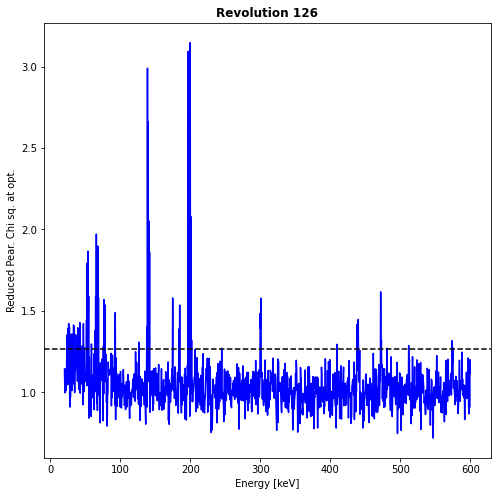

Bad Bins  [ 23.75  24.25  25.25  26.25  27.25  29.25  31.25  33.25  34.25  35.25
  36.25  39.25  41.25  42.25  45.25  46.25  47.25  48.25  51.75  52.75
  53.75  54.75  58.75  63.75  64.75  65.75  66.75  67.75  68.75  75.75
  76.75  77.75  92.75 126.75 137.75 138.75 139.75 140.75 141.75 174.75
 183.75 184.75 196.75 197.75 198.75 199.75 200.75 201.75 244.75 299.75
 300.25 300.75 409.25 437.75 438.25 438.75 439.75 471.75 472.75 480.75
 511.75 573.75 574.75]
Count  63
Tolerance  104.39999999999999
Dof  [59. 59. 59. ... 59. 59. 59.]
Width  [0.18411492 0.18411492 0.18411492 ... 0.18411492 0.18411492 0.18411492]


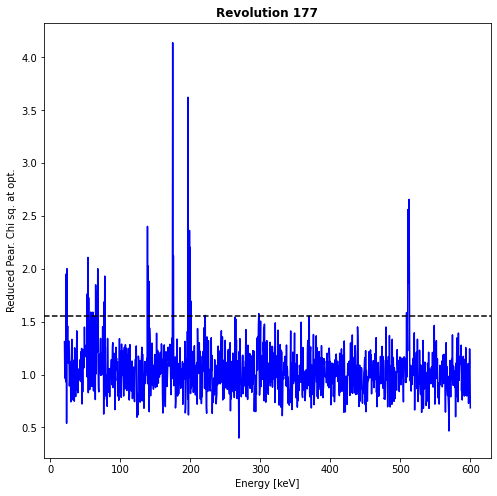

Bad Bins  [ 22.75  23.75  52.75  53.75  54.75  57.75  60.75  64.75  66.75  67.75
  76.75  77.75 138.75 139.75 140.75 174.75 175.75 196.75 197.75 198.75
 199.75 200.75 221.25 297.75 369.75 508.75 510.75 511.25 511.75 512.25
 512.75]
Count  31
Tolerance  104.39999999999999
Dof  [12. 12. 12. ... 12. 12. 12.]
Width  [0.40824829 0.40824829 0.40824829 ... 0.40824829 0.40824829 0.40824829]


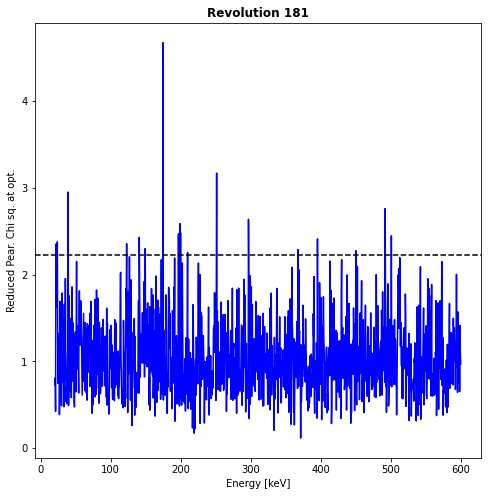

Bad Bins  [ 21.75  22.75  23.75  39.25 122.75 140.75 149.25 174.75 196.75 198.75
 199.75 209.75 251.25 296.75 367.25 395.25 450.25 491.75 500.75]
Count  19
Tolerance  104.39999999999999
Dof  [125. 125. 125. ... 125. 125. 125.]
Width  [0.12649111 0.12649111 0.12649111 ... 0.12649111 0.12649111 0.12649111]


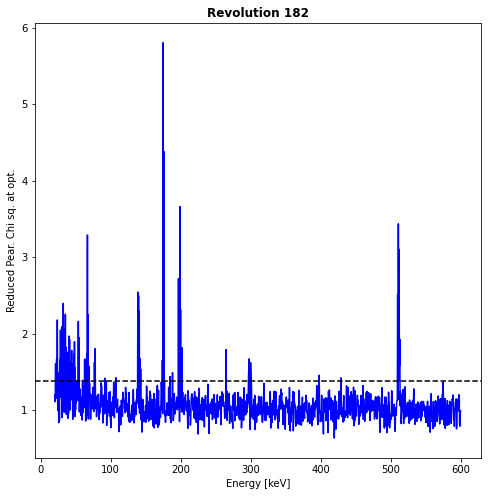

Bad Bins  [ 21.25  22.75  23.75  25.25  26.25  27.25  28.25  29.25  29.75  30.25
  31.25  32.25  33.25  34.25  35.25  36.25  37.25  38.25  39.25  40.25
  41.25  42.25  43.25  44.25  45.25  46.25  47.25  48.25  49.25  51.75
  53.75  54.75  59.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75
  76.75  77.75  91.75  93.75 107.25 138.75 139.75 140.75 141.75 142.75
 173.75 174.75 175.75 184.75 188.25 196.75 197.75 198.75 199.75 200.75
 201.75 264.75 296.75 297.25 297.75 299.75 300.75 397.75 428.75 509.75
 510.75 511.25 511.75 512.25 512.75]
Count  75
Tolerance  104.39999999999999
Dof  [40. 40. 40. ... 40. 40. 40.]
Width  [0.2236068 0.2236068 0.2236068 ... 0.2236068 0.2236068 0.2236068]


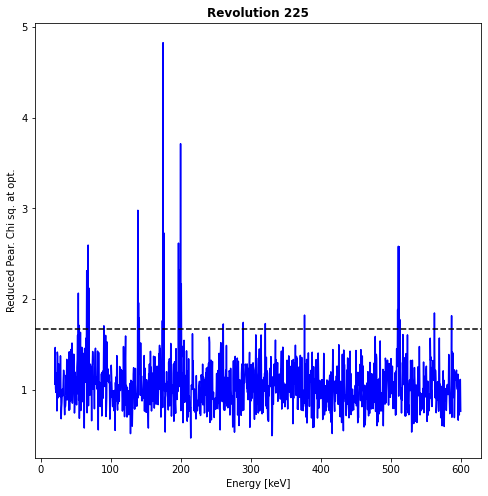

Bad Bins  [ 53.75  54.75  65.75  66.75  67.75  68.75  90.25 138.75 139.75 140.75
 173.75 174.75 175.75 196.75 197.75 198.75 199.75 200.75 260.75 289.25
 320.75 376.75 509.75 510.75 511.75 512.75 562.25 586.75]
Count  28
Tolerance  104.39999999999999
Dof  [27. 27. 27. ... 27. 27. 27.]
Width  [0.27216553 0.27216553 0.27216553 ... 0.27216553 0.27216553 0.27216553]


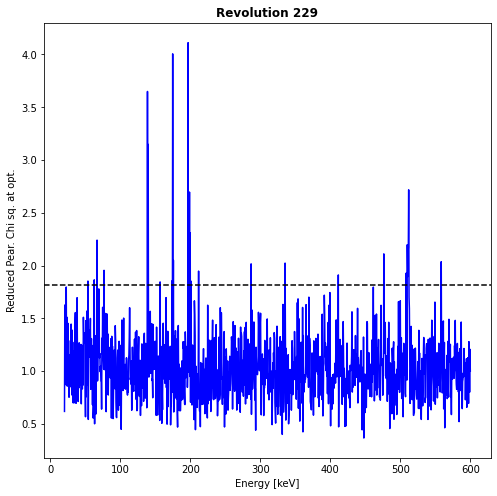

Bad Bins  [ 53.75  62.75  66.75  76.75 138.75 139.75 156.75 173.75 174.75 175.75
 196.75 198.75 199.75 200.75 211.75 286.75 335.25 411.25 476.25 508.25
 509.75 510.25 510.75 511.25 511.75 558.25]
Count  26
Tolerance  104.39999999999999
Dof  [1344. 1344. 1344. ... 1344. 1344. 1344.]
Width  [0.03857584 0.03857584 0.03857584 ... 0.03857584 0.03857584 0.03857584]


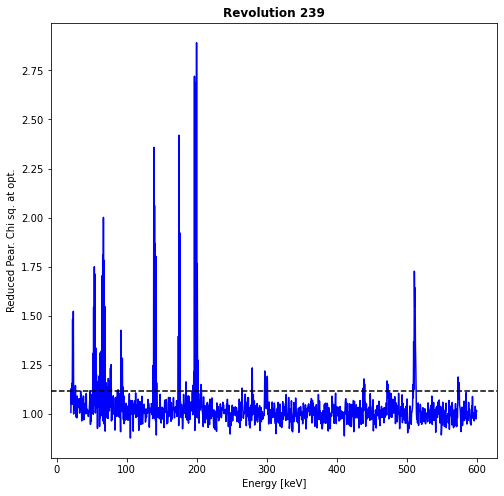

Bad Bins  [ 20.75  21.75  22.75  23.75  26.75  34.25  47.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  72.75  73.75  74.75
  75.75  76.75  77.75  86.75  87.75  91.75  92.75  93.75  94.75 137.75
 138.75 139.75 140.75 141.75 142.75 173.75 174.75 175.75 184.75 193.75
 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 206.25 206.75
 264.75 279.25 297.25 297.75 298.25 299.75 300.25 300.75 437.75 438.75
 439.75 471.75 472.75 473.75 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 573.25 574.75]
Count  84
Tolerance  104.39999999999999
Dof  [26. 26. 26. ... 26. 26. 26.]
Width  [0.2773501 0.2773501 0.2773501 ... 0.2773501 0.2773501 0.2773501]


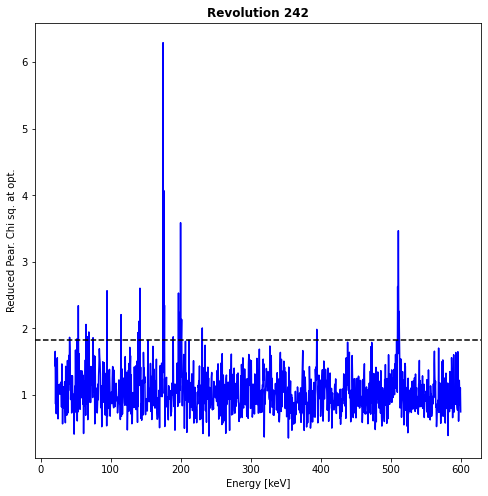

Bad Bins  [ 41.25  51.75  53.75  64.75  65.75  66.75  68.75  74.75  94.75 114.75
 138.75 139.75 140.75 141.75 174.75 175.75 176.75 189.25 196.75 198.75
 199.75 200.75 201.25 230.75 394.25 509.75 510.75 511.25 511.75]
Count  29
Tolerance  104.39999999999999
Dof  [668. 668. 668. ... 668. 668. 668.]
Width  [0.05471757 0.05471757 0.05471757 ... 0.05471757 0.05471757 0.05471757]


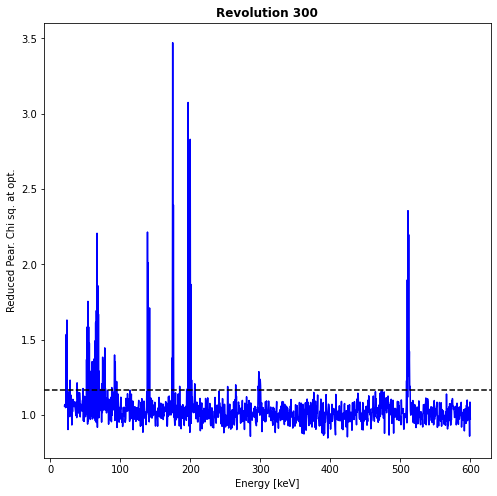

Bad Bins  [ 22.75  23.75  28.25  38.25  46.75  51.75  52.75  53.75  54.75  55.75
  56.75  58.75  59.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  70.75  73.75  74.75  76.75  77.75  78.75  87.75  91.75
  92.75  93.75  94.75 113.75 138.75 139.75 140.75 141.75 173.75 174.75
 175.75 184.75 194.75 196.75 197.75 198.75 199.75 200.75 201.75 206.25
 253.25 264.75 296.75 297.75 299.75 300.25 473.75 508.75 509.75 510.75
 511.25 511.75 512.25 512.75 513.25 513.75]
Count  66
Tolerance  104.39999999999999
Dof  [40. 40. 40. ... 40. 40. 40.]
Width  [0.2236068 0.2236068 0.2236068 ... 0.2236068 0.2236068 0.2236068]


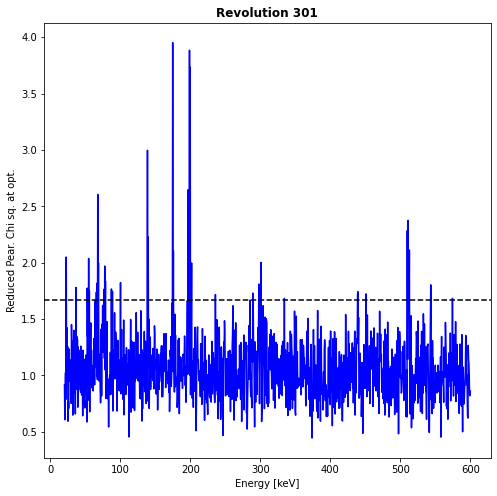

Bad Bins  [ 22.75  36.75  52.75  53.75  54.75  55.75  65.75  66.75  67.75  68.75
  76.75  77.75  78.75  87.25  88.75 100.25 138.75 139.75 174.75 175.75
 196.75 197.75 198.75 199.75 200.75 201.75 235.75 289.25 297.75 300.75
 334.25 438.75 439.25 450.75 509.75 510.75 511.75 512.75 543.25 574.25]
Count  40
Tolerance  104.39999999999999
Dof  [27. 27. 27. ... 27. 27. 27.]
Width  [0.27216553 0.27216553 0.27216553 ... 0.27216553 0.27216553 0.27216553]


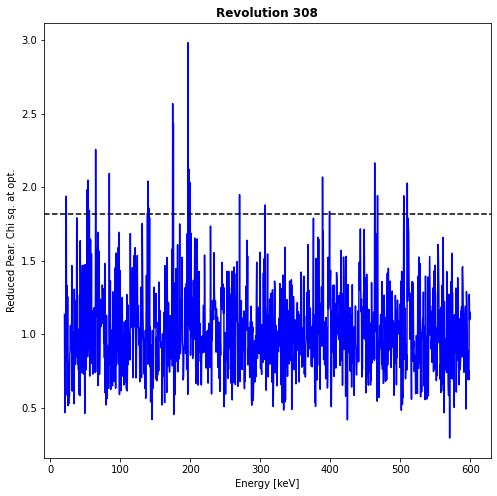

Bad Bins  [ 22.75  52.75  53.75  55.75  64.75  84.25 138.75 139.75 140.75 174.75
 175.75 196.75 197.75 199.75 270.25 306.75 388.75 398.75 463.25 467.25
 504.75 509.75]
Count  22
Tolerance  104.39999999999999
Dof  [176. 176. 176. ... 176. 176. 176.]
Width  [0.10660036 0.10660036 0.10660036 ... 0.10660036 0.10660036 0.10660036]


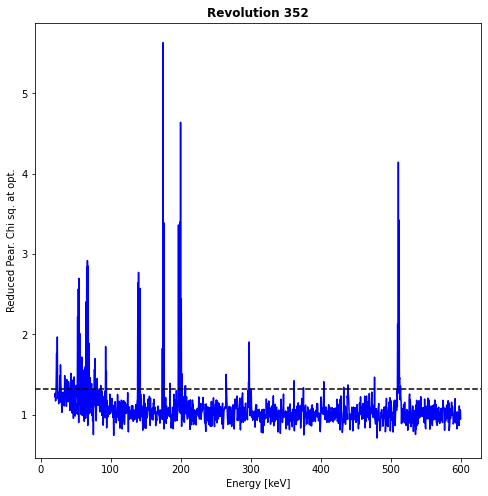

Bad Bins  [ 22.25  22.75  23.75  27.25  28.25  28.75  34.25  34.75  37.25  37.75
  39.75  42.75  43.25  44.25  46.25  47.75  50.75  52.75  53.75  54.75
  55.75  56.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  70.75  72.75  76.75  77.75  80.75  85.75  92.75
  93.75 138.75 139.75 140.75 141.75 173.75 174.75 175.75 184.75 196.75
 197.75 198.75 199.75 200.75 201.75 205.75 206.75 264.75 265.25 296.75
 297.25 297.75 300.25 361.75 375.25 404.25 432.75 438.75 476.75 509.75
 510.75 511.25 511.75 512.25 512.75 513.75]
Count  76
Tolerance  104.39999999999999
Dof  [309. 309. 309. ... 309. 309. 309.]
Width  [0.0804518 0.0804518 0.0804518 ... 0.0804518 0.0804518 0.0804518]


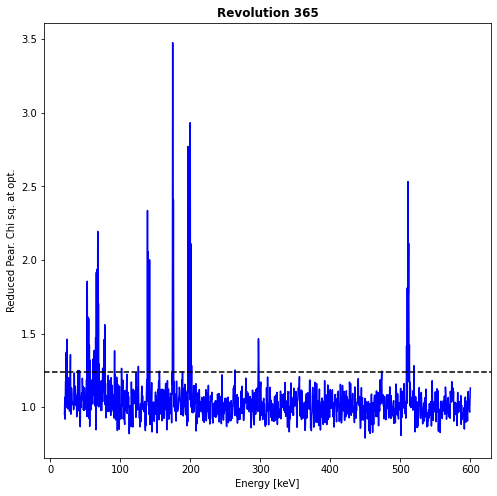

Bad Bins  [ 22.75  23.75  28.75  39.75  41.75  52.75  53.75  54.75  55.75  56.75
  60.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  74.75
  75.75  76.75  77.75  91.75 101.75 125.75 138.75 139.75 140.75 141.75
 155.75 174.75 175.75 196.75 197.75 198.75 199.75 200.75 201.75 263.75
 297.25 297.75 473.25 508.75 509.75 510.75 511.25 511.75 512.75 519.25]
Count  50
Tolerance  104.39999999999999
Dof  [12. 12. 12. ... 12. 12. 12.]
Width  [0.40824829 0.40824829 0.40824829 ... 0.40824829 0.40824829 0.40824829]


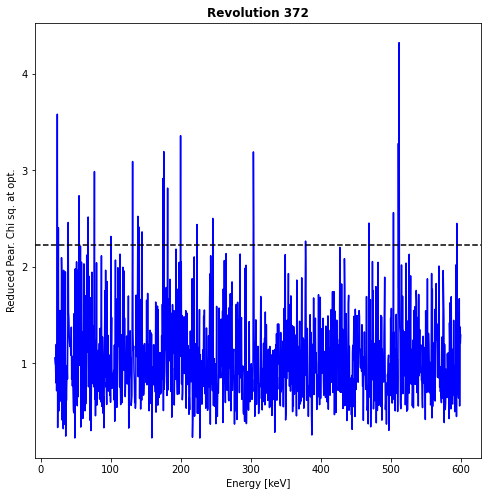

Bad Bins  [ 23.75  25.25  39.25  54.75  67.75  76.75 100.25 131.25 138.75 140.75
 144.75 174.75 175.75 181.25 199.75 223.25 245.75 303.75 304.25 378.25
 468.75 503.75 510.75 511.75 594.25]
Count  25
Tolerance  104.39999999999999
Dof  [12. 12. 12. ... 12. 12. 12.]
Width  [0.40824829 0.40824829 0.40824829 ... 0.40824829 0.40824829 0.40824829]


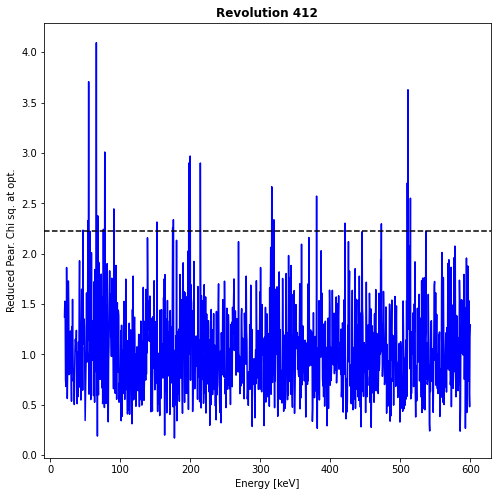

Bad Bins  [ 46.75  53.75  54.75  65.75  67.75  75.75  77.75  90.75 152.25 174.75
 175.75 197.75 198.75 199.75 214.25 316.25 319.25 380.25 420.75 472.75
 509.75 510.75 514.25]
Count  23
Tolerance  104.39999999999999
Dof  [27. 27. 27. ... 27. 27. 27.]
Width  [0.27216553 0.27216553 0.27216553 ... 0.27216553 0.27216553 0.27216553]


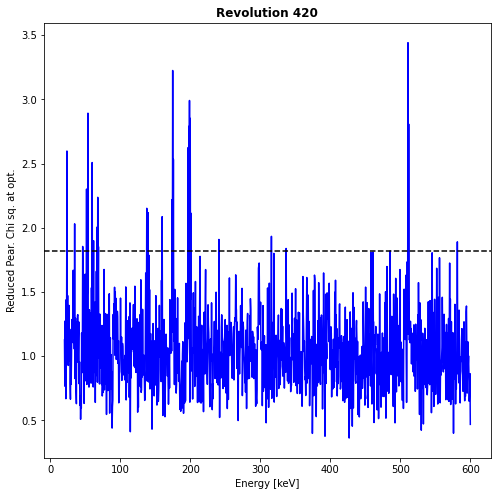

Bad Bins  [ 23.75  34.75  46.25  51.75  53.75  59.75  61.75  66.75  67.75  68.75
 137.75 138.75 139.75 159.75 173.75 174.75 175.75 196.75 197.75 198.75
 199.75 200.75 240.75 315.75 336.75 485.25 510.75 511.75 581.25]
Count  29
Tolerance  104.39999999999999
Dof  [1539. 1539. 1539. ... 1539. 1539. 1539.]
Width  [0.0360492 0.0360492 0.0360492 ... 0.0360492 0.0360492 0.0360492]


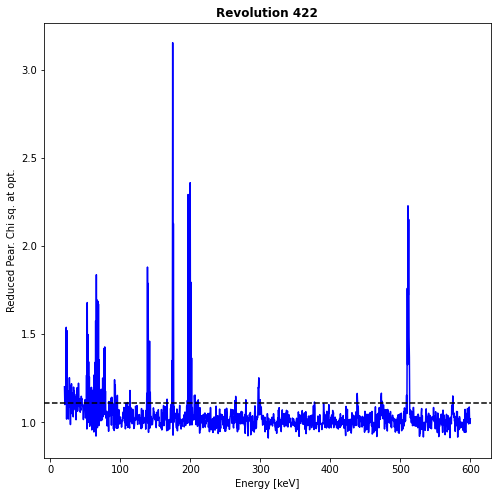

Bad Bins  [ 20.25  21.25  21.75  22.25  22.75  23.75  26.25  27.25  28.25  29.25
  30.25  31.25  32.25  33.25  33.75  34.25  35.25  36.25  37.25  38.25
  39.75  40.25  40.75  41.25  42.25  44.25  44.75  45.25  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  72.75  73.75  74.75  75.75  76.75  77.75  78.75  83.75  86.75  87.75
  91.75  92.75  94.75  95.75 108.25 110.25 113.75 137.75 138.75 139.75
 140.75 141.75 142.75 166.75 173.75 174.75 175.75 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 205.75 206.75 208.75 211.25 263.75 264.75
 279.25 296.75 297.25 297.75 299.75 377.25 438.25 438.75 472.25 472.75
 473.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 574.75]
Count  110
Tolerance  104.39999999999999
Dof  [12. 12. 12. ... 12. 12. 12.]
Width  [0.40824829 0.40824829 0.40824829 ... 0.40824829 0.40824829 0.40824829]


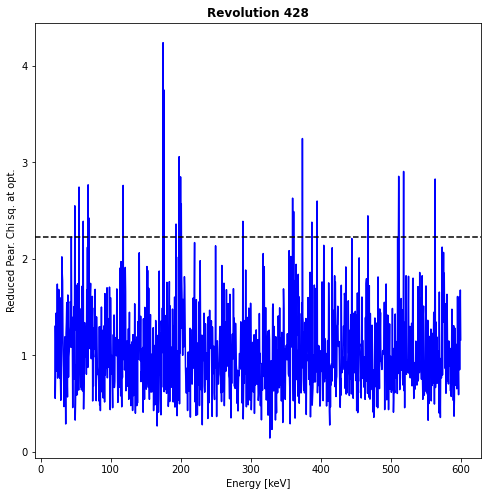

Bad Bins  [ 43.75  48.75  54.75  60.75  67.75  68.75 117.75 174.75 175.75 193.25
 197.75 198.75 199.75 200.75 288.75 359.75 361.25 373.75 387.25 394.75
 467.25 511.25 518.25 563.25]
Count  24
Tolerance  104.39999999999999
Dof  [10. 10. 10. ... 10. 10. 10.]
Width  [0.4472136 0.4472136 0.4472136 ... 0.4472136 0.4472136 0.4472136]


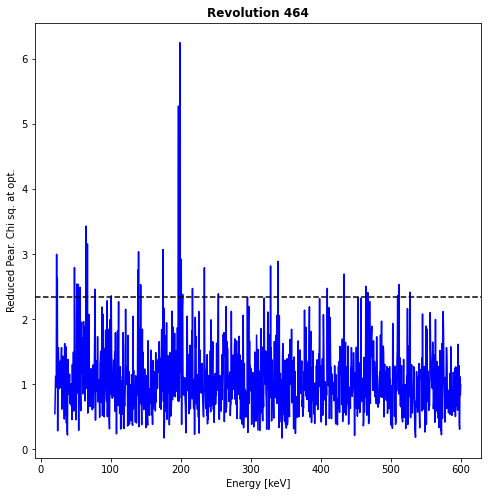

Bad Bins  [ 22.75  23.75  48.25  51.75  53.75  54.75  56.25  64.75  65.75  66.75
  77.75 100.75 138.75 139.75 142.75 174.75 196.75 197.75 198.75 200.75
 202.75 216.75 233.75 253.75 328.25 338.75 409.25 433.25 464.25 467.25
 509.75 511.75 527.25]
Count  33
Tolerance  104.39999999999999
Dof  [40. 40. 40. ... 40. 40. 40.]
Width  [0.2236068 0.2236068 0.2236068 ... 0.2236068 0.2236068 0.2236068]


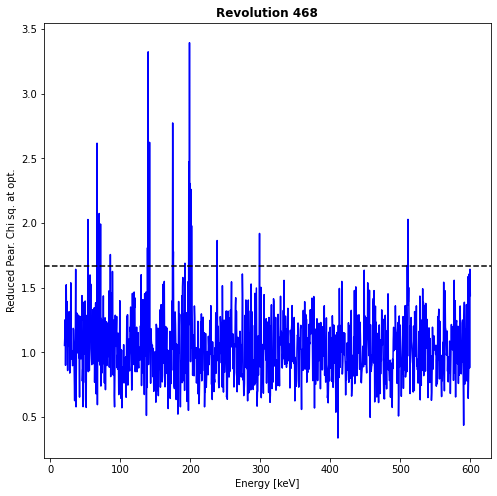

Bad Bins  [ 53.75  66.75  67.75  68.75  69.75  71.75  85.75 138.75 139.75 141.75
 174.75 175.75 192.25 197.75 198.75 199.75 200.75 201.75 238.25 298.75
 509.75 510.75]
Count  22
Tolerance  104.39999999999999
Dof  [385. 385. 385. ... 385. 385. 385.]
Width  [0.072075 0.072075 0.072075 ... 0.072075 0.072075 0.072075]


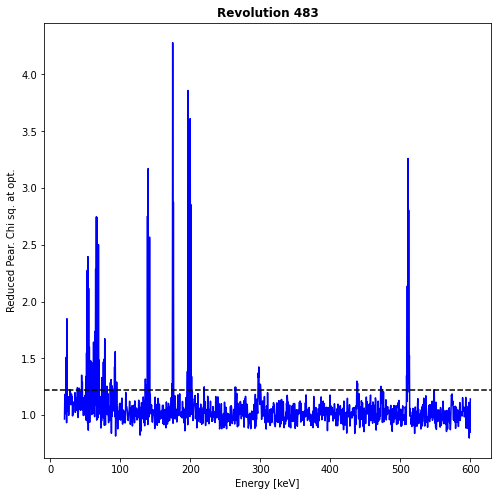

Bad Bins  [ 22.75  23.75  28.25  38.75  41.25  44.75  45.75  50.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  73.75  74.75  75.75
  76.75  77.75  80.75  85.75  86.75  87.75  89.75  91.75  92.75  94.75
 135.75 137.75 138.75 139.75 140.75 141.75 173.75 174.75 175.75 195.75
 196.75 197.75 198.75 199.75 200.75 201.75 219.75 263.75 264.75 296.75
 297.25 297.75 299.75 300.25 437.75 438.25 438.75 471.75 472.25 473.75
 508.75 509.75 510.75 511.25 511.75 512.25 512.75 548.25]
Count  78
Tolerance  104.39999999999999
Dof  [774. 774. 774. ... 774. 774. 774.]
Width  [0.05083286 0.05083286 0.05083286 ... 0.05083286 0.05083286 0.05083286]


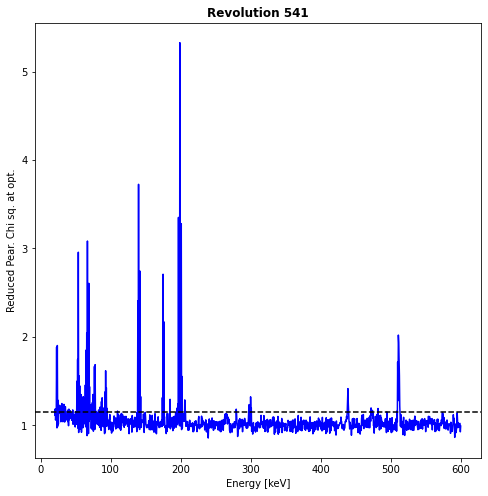

Bad Bins  [ 20.75  22.75  23.75  24.75  25.75  26.75  27.25  27.75  28.25  29.25
  30.25  32.25  33.25  35.25  38.25  39.25  40.25  41.25  42.25  45.75
  49.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  70.75  71.75  73.75  74.75  75.75  76.75  77.75  78.75  82.75  84.75
  85.75  86.75  87.75  89.75  91.75  92.75  93.75  94.75 109.75 138.75
 139.75 140.75 141.75 142.75 173.75 174.75 175.75 184.75 194.75 195.75
 196.75 197.75 198.75 199.75 200.75 201.75 205.75 206.75 279.25 297.25
 297.75 299.75 300.75 437.75 438.25 438.75 439.25 471.75 473.75 481.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75]
Count  98
Tolerance  104.39999999999999
Dof  [819. 819. 819. ... 819. 819. 819.]
Width  [0.04941662 0.04941662 0.04941662 ... 0.04941662 0.04941662 0.04941662]


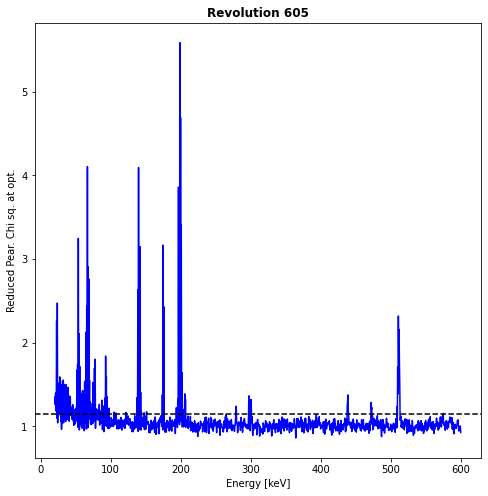

Bad Bins  [ 20.25  20.75  21.25  21.75  22.25  22.75  23.75  24.75  26.25  26.75
  27.25  27.75  28.25  29.25  30.25  31.25  32.25  33.25  34.25  34.75
  35.25  36.25  37.25  38.25  39.25  39.75  40.25  41.25  41.75  42.25
  43.25  45.75  47.75  48.75  50.25  50.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.25  69.75  70.75  71.75  73.75  74.75
  75.75  76.75  77.75  78.75  79.75  80.75  83.25  83.75  84.75  86.75
  87.75  88.75  89.75  91.75  92.75  93.75  94.75  97.75 104.75 107.75
 121.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 147.75 151.25
 173.75 174.75 175.75 193.75 194.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 202.75 205.75 206.75 278.75 279.25 297.25 297.75 299.75
 300.25 300.75 437.75 438.25 438.75 439.25 471.75 472.25 472.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75 574.75]
Count  128
Tolerance  104.39999999999999
Dof  [27. 27. 27. ... 27. 27. 27.]
Widt

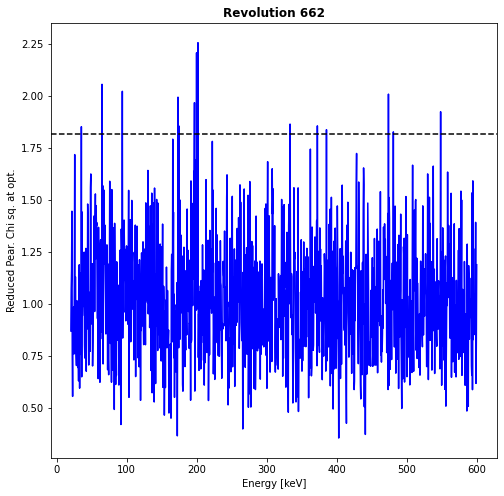

Bad Bins  [ 35.25  64.75  93.75 173.25 174.75 196.75 199.75 201.75 333.25 372.25
 385.25 473.75 480.75 548.25]
Count  14
Tolerance  104.39999999999999
Dof  [1254. 1254. 1254. ... 1254. 1254. 1254.]
Width  [0.03993615 0.03993615 0.03993615 ... 0.03993615 0.03993615 0.03993615]


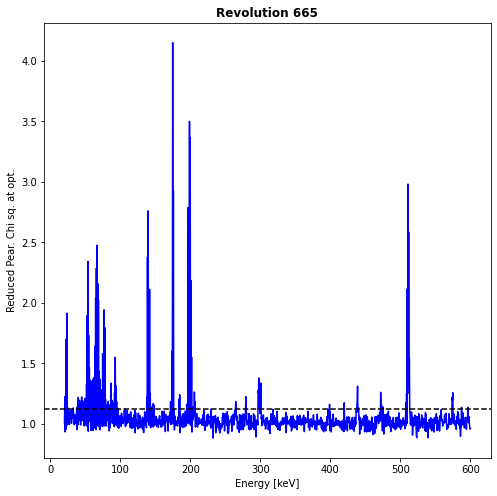

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  32.75  37.75  39.75  41.75
  42.75  43.75  44.75  45.75  46.75  48.75  49.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75
  74.75  75.75  76.75  77.75  78.75  79.75  80.75  82.75  83.75  84.75
  85.75  86.75  87.75  89.75  91.75  92.75  93.75  94.75  95.75  96.75
 106.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 146.75 147.75
 171.75 173.75 174.75 175.75 183.75 184.75 194.75 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 202.75 204.75 205.75 206.75 229.75 264.75
 279.25 296.75 297.25 297.75 298.75 299.75 300.75 318.25 398.75 419.75
 437.75 438.25 438.75 440.25 471.75 472.75 474.75 507.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 573.75 574.25 574.75 587.25
 596.25]
Count  121
Tolerance  104.39999999999999
Dof  [1449. 1449. 1449. ... 1449. 1449. 1449.]
Width  [0.03715188 0.03715188 0.03715188 

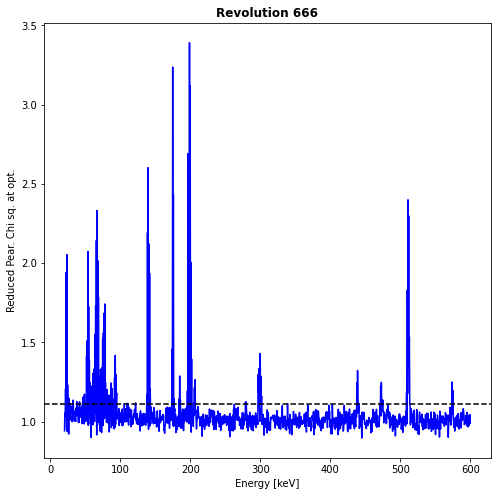

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  32.75  37.75  38.75  41.75
  46.75  47.75  48.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75
  78.75  79.75  80.75  82.75  83.75  85.75  86.75  87.75  89.75  91.75
  92.75  93.75  94.25  94.75 105.75 109.75 121.75 137.75 138.75 139.75
 140.75 141.75 142.75 173.75 174.75 175.75 176.75 183.75 184.75 185.75
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 204.75 205.75 206.75
 278.75 279.75 296.75 297.25 297.75 299.75 300.25 300.75 301.75 338.75
 437.75 438.25 438.75 439.25 440.75 470.75 471.75 472.75 473.75 474.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 573.75 574.75]
Count  110
Tolerance  104.39999999999999
Dof  [1254. 1254. 1254. ... 1254. 1254. 1254.]
Width  [0.03993615 0.03993615 0.03993615 ... 0.03993615 0.03993615 0.03993615]


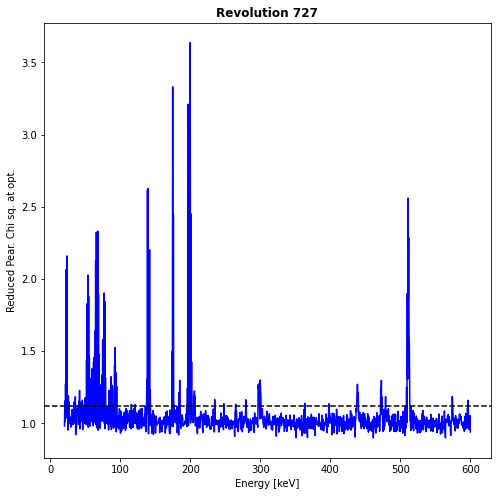

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  33.75  35.75  38.75
  40.75  41.75  43.75  44.75  45.75  47.75  49.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75
  74.75  75.75  76.75  77.75  78.75  80.75  83.75  86.75  87.75  88.75
  89.75  91.75  92.75  93.75  94.75 115.75 120.75 137.75 138.75 139.75
 140.75 141.75 142.75 173.75 174.75 175.75 176.75 183.75 184.75 194.75
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 204.75 205.75 206.75
 234.75 247.75 264.75 279.25 296.75 297.25 297.75 298.25 298.75 299.75
 300.25 300.75 363.75 397.75 437.75 438.25 438.75 439.25 439.75 471.75
 472.25 472.75 473.75 478.75 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 513.25 573.75 574.25 596.75]
Count  116
Tolerance  104.39999999999999
Dof  [714. 714. 714. ... 714. 714. 714.]
Width  [0.05292561 0.05292561 0.05292561 ... 0.05292561 0.05292561 0.05292561]


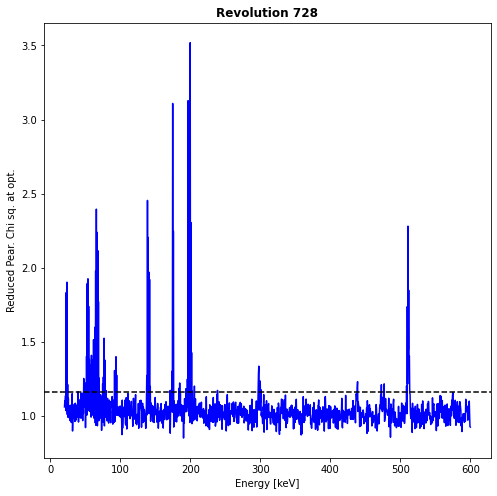

Bad Bins  [ 22.75  23.75  24.75  39.75  47.75  49.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  74.75  75.75  76.75  77.75  79.75
  91.75  92.75  93.75  94.75 137.75 138.75 139.75 140.75 141.75 142.75
 170.75 172.75 173.75 174.75 175.75 183.75 184.75 193.75 194.75 195.75
 196.75 197.75 198.75 199.75 200.75 201.75 202.75 205.75 238.75 296.75
 297.25 297.75 299.75 300.75 438.25 438.75 472.75 476.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75]
Count  76
Tolerance  104.39999999999999
Dof  [1599. 1599. 1599. ... 1599. 1599. 1599.]
Width  [0.03536639 0.03536639 0.03536639 ... 0.03536639 0.03536639 0.03536639]


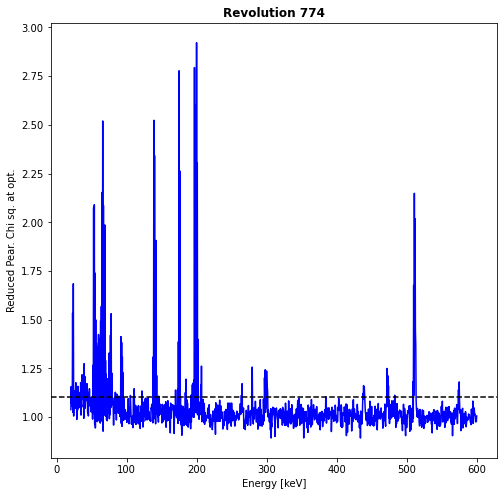

Bad Bins  [ 20.75  22.75  23.75  25.75  26.25  27.25  27.75  28.25  29.25  30.25
  31.75  33.25  34.25  36.25  36.75  37.25  38.25  39.25  40.25  41.25
  42.25  42.75  43.25  44.75  45.75  46.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75
  75.75  76.75  77.75  78.75  79.25  83.75  85.75  88.75  91.75  92.75
  93.75  94.75 105.25 110.75 121.75 137.75 138.75 139.75 140.75 141.75
 142.75 145.75 169.75 172.75 173.75 174.75 175.75 176.75 183.75 184.75
 191.75 193.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75
 205.75 206.75 263.75 264.75 279.25 296.75 297.75 299.75 300.25 300.75
 301.25 437.25 438.25 438.75 439.25 439.75 471.75 472.75 473.75 482.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 573.75 574.75]
Count  120
Tolerance  104.39999999999999
Dof  [416. 416. 416. ... 416. 416. 416.]
Width  [0.06933752 0.06933752 0.06933752 ... 0.06933752

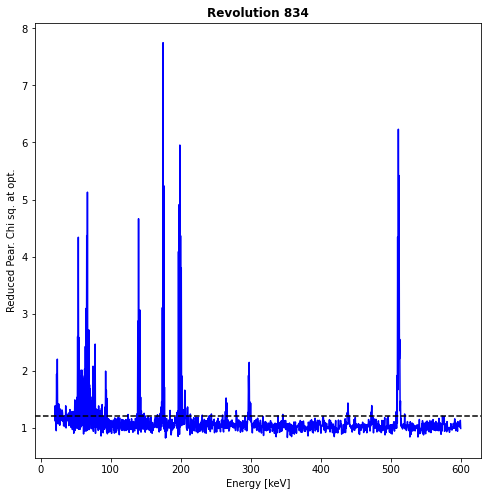

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.25  29.75
  30.75  31.25  34.75  35.75  37.25  38.25  39.75  40.75  41.75  44.75
  45.75  47.75  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.25  70.75  71.75  72.75  73.75  74.75
  75.75  76.75  77.75  78.75  81.75  82.75  83.75  84.75  86.75  87.75
  91.75  92.75  93.75  94.75 124.75 137.75 138.75 139.75 140.75 141.75
 142.75 143.75 145.75 146.75 147.75 148.75 166.75 169.75 170.75 171.75
 172.75 173.75 174.75 175.75 176.75 184.75 194.75 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 202.75 203.75 204.75 205.75 206.75 207.25
 209.75 213.75 230.75 240.75 243.75 259.75 263.75 264.75 265.75 279.25
 295.75 296.75 297.25 297.75 298.75 299.75 338.75 345.75 437.75 438.25
 438.75 439.25 440.75 471.75 472.25 472.75 507.75 508.75 509.75 510.25
 510.75 511.25 511.75 512.25 512.75 513.25 513.75 519.75]
Count  13

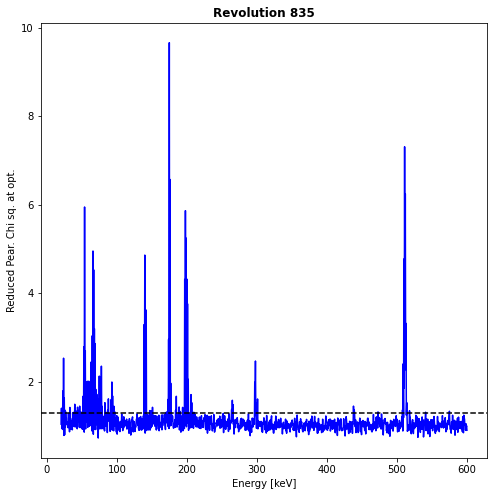

Bad Bins  [ 20.75  22.75  23.75  24.75  25.75  26.75  32.75  37.75  39.75  42.75
  43.75  45.75  46.75  48.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  73.75  74.75  75.75  76.75
  77.75  78.75  82.75  84.75  86.75  87.75  91.75  92.75  93.75  95.75
  96.75 138.75 139.75 140.75 141.75 146.75 148.75 150.75 170.75 172.75
 173.75 174.75 175.75 176.75 183.75 184.75 188.75 189.75 193.75 194.75
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 204.75 205.75 206.75
 209.75 263.75 264.75 265.75 296.75 297.25 297.75 298.75 299.75 300.75
 437.75 438.75 439.25 472.75 507.75 508.75 509.75 510.25 510.75 511.25
 511.75 512.25 512.75 513.75 517.75 540.75 574.75]
Count  107
Tolerance  104.39999999999999
Dof  [192. 192. 192. ... 192. 192. 192.]
Width  [0.10206207 0.10206207 0.10206207 ... 0.10206207 0.10206207 0.10206207]


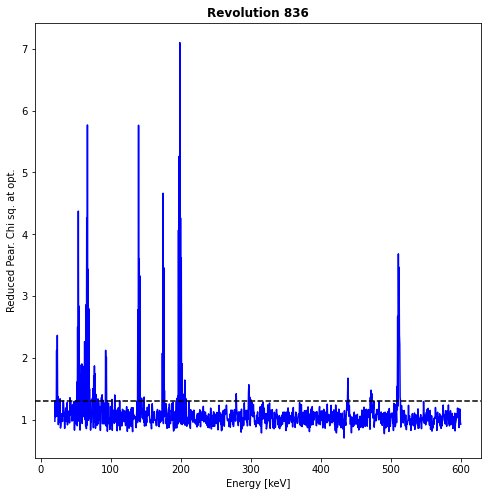

Bad Bins  [ 20.75  22.75  23.75  24.75  27.75  41.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  70.75  73.75  74.75  75.75  76.75
  77.75  78.75  81.75  86.75  87.75  88.75  92.75  93.75  94.75 101.75
 105.75 112.75 138.75 139.75 140.75 141.75 142.75 143.75 146.75 147.75
 173.75 174.75 175.75 176.75 194.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 203.75 204.75 205.75 206.75 207.75 279.25 296.75 297.25
 297.75 298.75 300.25 438.25 438.75 439.75 470.75 471.75 472.25 472.75
 508.75 509.75 510.75 511.25 511.75 512.25 512.75 513.25 513.75]
Count  89
Tolerance  104.39999999999999
Dof  [1562. 1562. 1562. ... 1562. 1562. 1562.]
Width  [0.03578281 0.03578281 0.03578281 ... 0.03578281 0.03578281 0.03578281]


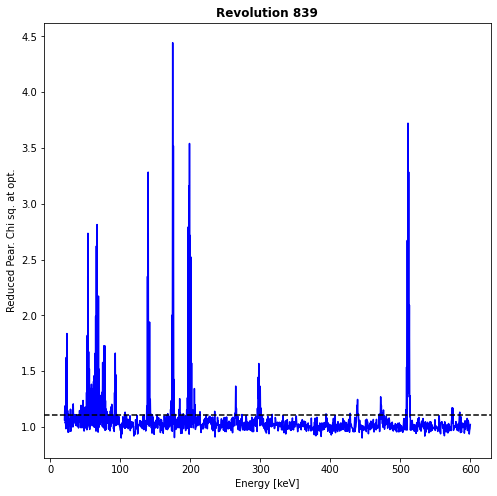

Bad Bins  [ 20.75  22.75  23.75  24.75  25.75  28.75  31.75  32.75  34.75  36.75
  40.75  41.75  42.75  43.75  45.75  46.75  47.75  48.75  49.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75  80.75  85.75
  86.75  87.75  91.75  92.75  93.75  94.75 106.75 137.75 138.75 139.75
 140.75 141.75 142.75 143.75 145.75 167.75 171.75 172.75 173.75 174.75
 175.75 176.75 177.75 183.75 184.75 185.75 189.75 194.75 195.75 196.75
 197.75 198.75 199.75 200.75 201.75 202.75 203.75 204.75 205.75 206.75
 213.75 222.75 234.75 263.75 264.75 265.75 273.75 295.75 296.75 297.25
 297.75 298.25 298.75 299.75 300.75 316.75 393.75 428.25 437.75 438.25
 438.75 439.25 439.75 469.75 471.75 472.25 472.75 474.75 475.75 507.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.75 573.75
 574.75 584.25 584.75]
Count  133
Tolerance  104.39999999999999
Dof

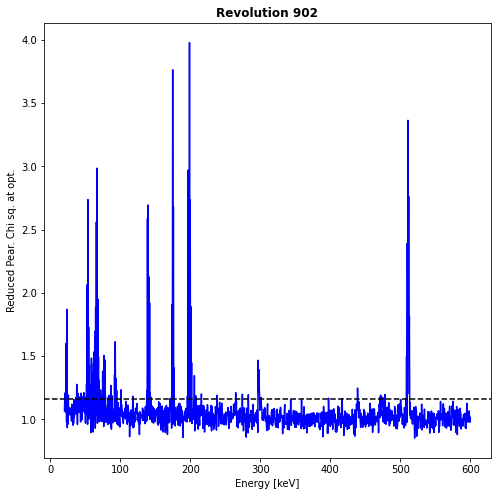

Bad Bins  [ 20.75  22.75  23.75  25.75  36.75  37.75  39.75  42.75  43.75  45.75
  47.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75
  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75
  69.75  70.75  71.75  73.75  74.75  75.75  76.75  77.75  78.75  82.75
  83.75  86.75  87.75  91.75  92.75  93.75  94.75 100.75 117.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 171.75 173.75 174.75 175.75
 176.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 205.75 206.75
 207.75 215.75 237.75 264.75 274.25 282.75 296.75 297.25 297.75 298.25
 298.75 300.75 397.25 416.75 438.75 470.75 471.75 472.75 473.75 474.75
 477.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75]
Count  99
Tolerance  104.39999999999999
Dof  [1312. 1312. 1312. ... 1312. 1312. 1312.]
Width  [0.03904344 0.03904344 0.03904344 ... 0.03904344 0.03904344 0.03904344]


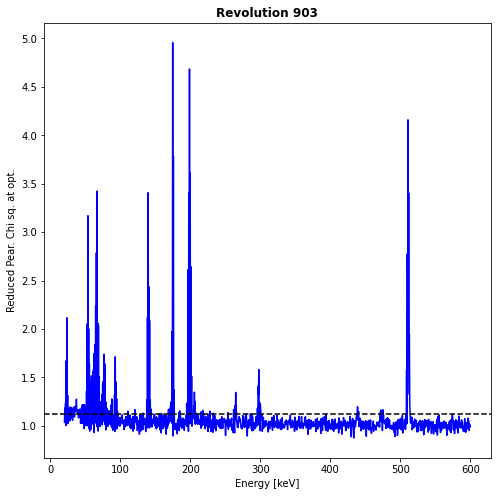

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.25  26.75  27.25  28.25
  29.25  30.25  30.75  32.75  33.25  33.75  35.25  35.75  36.25  36.75
  37.25  37.75  38.25  38.75  39.25  39.75  40.75  41.25  41.75  42.75
  43.75  44.75  45.75  46.75  47.75  48.75  49.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.25
  73.75  74.75  75.75  76.75  77.75  78.75  79.75  80.75  81.75  83.75
  84.75  85.75  86.75  87.75  88.75  91.75  92.75  93.75  94.75  95.75
  96.75 110.75 120.75 127.75 132.75 137.75 138.75 139.75 140.75 141.75
 142.75 143.75 147.75 155.75 158.75 168.75 169.75 170.75 171.75 172.75
 173.75 174.75 175.75 176.75 183.75 184.75 194.75 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 204.75 205.75 206.75 207.75 208.75 214.75
 215.75 217.75 218.75 224.75 227.75 232.75 253.75 261.75 263.75 264.75
 265.75 279.25 285.75 295.75 296.75 297.25 297.75 298.25 298.75 299

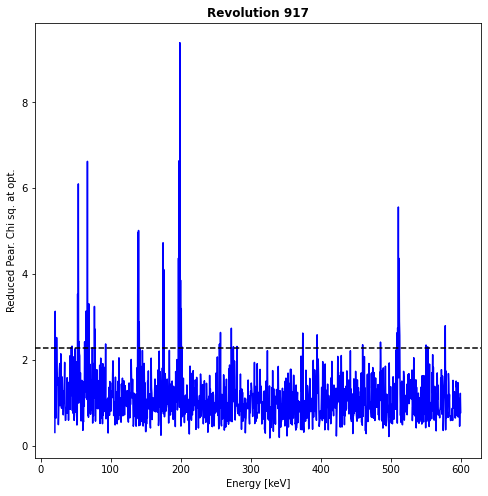

Bad Bins  [ 20.75  22.75  43.75  44.75  52.75  53.75  54.75  62.75  64.75  66.75
  67.75  68.75  76.75  77.75  92.75 138.75 139.75 140.75 174.75 175.75
 196.75 197.75 198.75 199.75 200.75 201.75 255.25 256.75 272.25 275.25
 280.25 374.25 394.75 459.75 485.25 508.75 509.75 510.75 511.75 512.25
 512.75 550.25 552.75 577.75]
Count  44
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761505 0.07761505 ... 0.07761505 0.07761505 0.07761505]


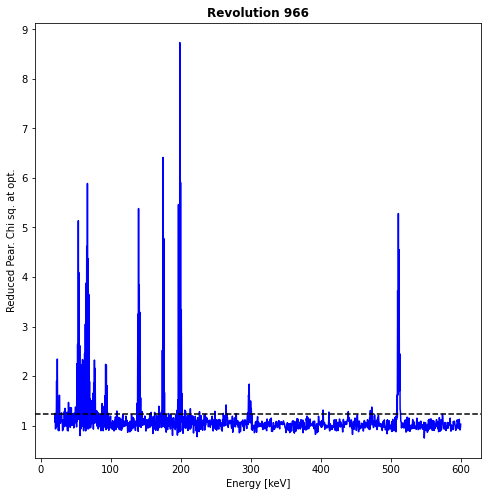

Bad Bins  [ 20.75  22.75  23.75  24.75  25.75  26.75  29.75  33.75  34.75  37.75
  39.75  40.75  41.75  42.75  43.75  44.75  47.75  49.75  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75  80.75  81.75
  86.75  87.75  90.75  91.75  92.75  93.75  94.75  96.75 108.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 144.75 155.75 157.75 162.75
 168.75 169.75 171.75 172.75 173.75 174.75 175.75 176.75 182.75 194.75
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 205.75 206.75 213.75
 226.75 248.75 260.75 264.75 265.75 279.25 295.75 296.75 297.25 297.75
 299.75 300.75 301.75 403.25 411.75 439.25 470.75 472.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 513.25 513.75]
Count  118
Tolerance  104.39999999999999
Dof  [956. 956. 956. ... 956. 956. 956.]
Width  [0.04573894 0.04573894 0.04573894 ... 0.04573894 0.04573894 0.

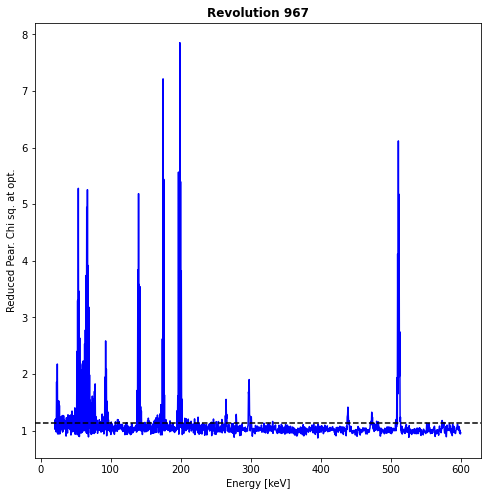

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75
  30.75  31.75  32.75  33.75  35.75  36.75  37.75  38.75  39.75  40.75
  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75  80.75
  83.75  84.75  87.75  89.75  90.75  91.75  92.75  93.75  94.75  95.75
  96.75 100.75 106.75 109.75 110.75 111.75 122.75 137.75 138.75 139.75
 140.75 141.75 142.75 143.75 148.75 152.75 153.75 154.75 155.75 156.75
 161.75 162.75 164.75 165.75 166.75 167.75 168.75 169.75 170.75 171.75
 172.75 173.75 174.75 175.75 176.75 177.75 178.75 184.75 194.75 195.75
 196.75 197.75 198.75 199.75 200.75 201.75 205.75 206.75 207.75 210.75
 211.75 214.75 219.75 224.75 225.75 243.75 246.75 250.75 253.75 258.75
 263.75 264.75 265.25 265.75 279.25 296.75 297.25 297.75 298.25 298

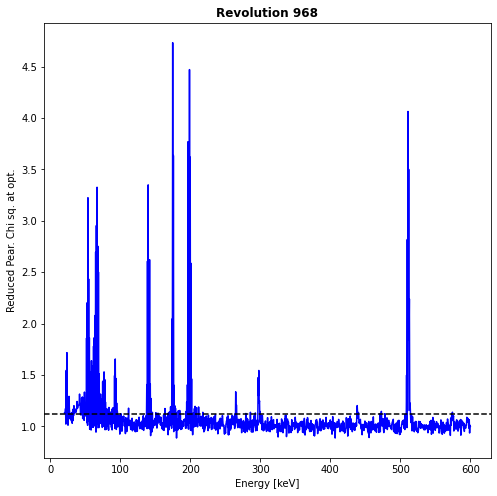

Bad Bins  [ 20.25  20.75  21.25  21.75  22.75  23.75  24.75  25.75  26.75  27.25
  27.75  28.75  29.75  30.75  32.75  33.75  34.25  34.75  35.25  35.75
  36.25  36.75  37.25  37.75  38.25  38.75  39.25  39.75  40.25  40.75
  41.25  41.75  42.25  42.75  43.75  44.25  44.75  45.75  46.75  47.75
  48.75  49.25  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75
  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75
  67.75  68.75  69.75  70.75  71.75  72.75  73.25  73.75  74.75  75.75
  76.75  77.75  78.75  79.75  80.75  81.75  83.75  86.75  87.75  89.75
  90.75  91.75  92.75  93.75  94.75  95.75 100.75 111.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 145.75 150.75 153.75 163.75 167.75
 169.75 170.75 171.75 172.75 173.75 174.75 175.75 176.75 177.75 178.75
 179.75 182.75 183.75 184.75 193.75 194.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 202.75 204.75 205.75 206.75 208.75 211.75 217.75
 263.75 264.75 265.75 279.25 285.75 292.75 296.75 297.25 297.75 298

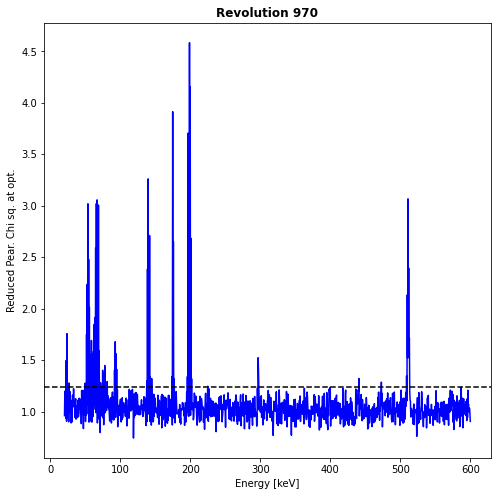

Bad Bins  [ 22.75  23.75  26.75  49.75  51.75  52.75  53.75  54.75  55.75  56.75
  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75
  67.75  68.75  69.75  70.75  71.75  74.75  75.75  76.75  77.75  81.25
  91.75  92.75  93.75  94.75 137.75 138.75 139.75 140.75 141.75 142.75
 144.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 224.75 296.75 297.25 440.75 472.75 508.75 509.75 510.25
 510.75 511.25 511.75 512.25 512.75]
Count  65
Tolerance  104.39999999999999
Dof  [1307. 1307. 1307. ... 1307. 1307. 1307.]
Width  [0.03911805 0.03911805 0.03911805 ... 0.03911805 0.03911805 0.03911805]


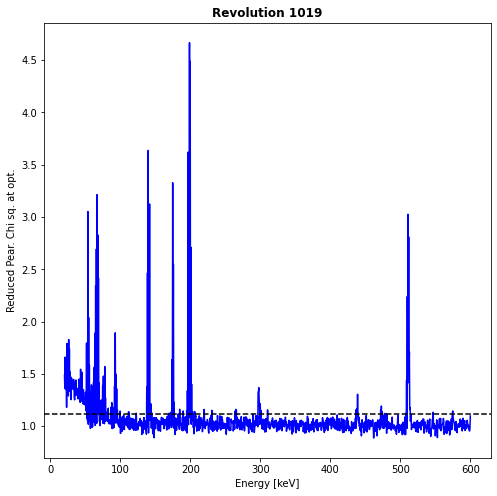

Bad Bins  [ 20.25  20.75  21.25  21.75  22.25  22.75  23.25  23.75  24.25  24.75
  25.25  25.75  26.25  26.75  27.25  27.75  28.25  28.75  29.25  29.75
  30.25  30.75  31.25  31.75  32.25  32.75  33.25  33.75  34.25  34.75
  35.25  35.75  36.25  36.75  37.25  37.75  38.25  38.75  39.25  39.75
  40.25  40.75  41.25  41.75  42.25  42.75  43.25  43.75  44.25  44.75
  45.25  45.75  46.25  46.75  47.25  47.75  48.25  48.75  49.25  49.75
  50.25  50.75  51.25  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.25
  67.75  68.25  68.75  69.75  70.75  71.75  72.75  73.25  73.75  74.75
  75.75  76.75  77.75  78.75  80.75  82.75  86.75  87.75  88.75  90.75
  91.75  92.75  93.75  94.75  95.75  99.75 111.75 112.75 122.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 144.75 169.75 172.25 172.75
 173.75 174.75 175.75 176.75 182.75 184.75 189.75 194.75 195.75 196.75
 197.75 198.75 199.25 199.75 200.75 201.75 202.75 205.75 206.75 219

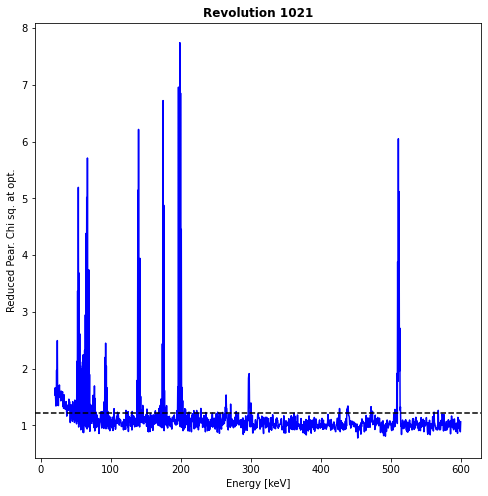

Bad Bins  [ 20.25  20.75  21.25  21.75  22.25  22.75  23.25  23.75  24.25  24.75
  25.25  25.75  26.25  26.75  27.25  27.75  28.25  28.75  29.25  29.75
  30.25  30.75  31.25  31.75  32.25  32.75  33.25  33.75  34.25  34.75
  35.25  35.75  36.25  36.75  37.75  38.25  38.75  39.25  39.75  40.25
  40.75  41.25  41.75  43.25  44.25  44.75  45.75  46.75  48.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  72.75  73.75  74.75  75.75  76.75  77.75  78.75  85.75  87.75  90.75
  91.75  92.75  93.75  94.75  95.75 104.75 109.75 121.75 124.75 130.75
 137.75 138.75 139.75 140.75 141.75 142.75 143.75 145.75 151.75 163.75
 168.75 170.75 171.75 172.75 173.75 174.75 175.75 176.75 177.75 179.75
 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 202.75 205.75
 206.75 210.75 211.75 218.75 219.75 222.75 228.75 235.75 252.75 259.75
 263.75 264.75 265.25 265.75 271.25 279.25 296.75 297.25 297.75 298

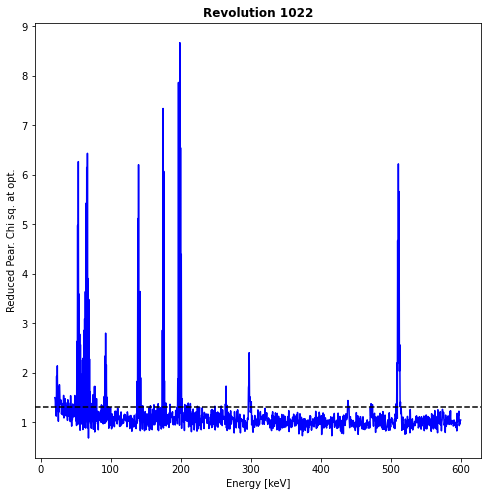

Bad Bins  [ 20.25  20.75  21.25  21.75  22.75  23.75  24.75  25.75  26.75  27.25
  27.75  28.25  28.75  29.25  30.75  32.75  33.75  34.75  35.75  36.75
  37.25  37.75  38.75  39.75  42.75  44.75  45.75  48.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  74.75  75.75  76.75  77.75  78.75  79.75  86.75  87.75  90.75
  91.75  92.75  93.75  94.75  95.75  96.75 137.75 138.75 139.75 140.75
 141.75 142.75 143.75 145.75 156.75 161.75 167.75 172.75 173.75 174.75
 175.75 176.75 178.75 184.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 205.75 208.25 210.75 213.75 223.75 248.75 257.75 263.75 264.75
 265.75 296.75 297.25 297.75 298.25 298.75 300.75 438.25 438.75 439.25
 439.75 440.25 471.75 473.75 507.75 508.75 509.75 510.25 510.75 511.25
 511.75 512.25 512.75 513.25 513.75]
Count  125
Tolerance  104.39999999999999
Dof  [152. 152. 152. ... 152. 152. 152.]
Width  [0.11470787 

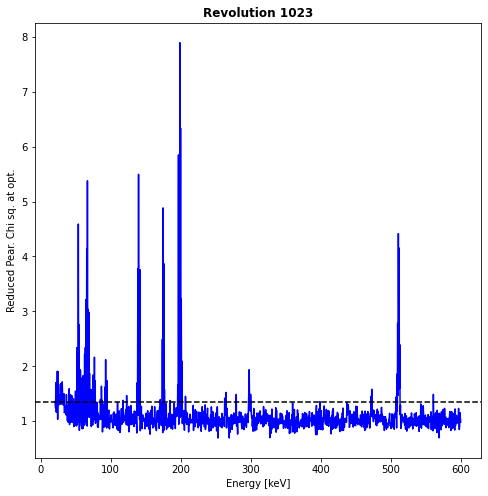

Bad Bins  [ 20.25  20.75  21.75  23.25  23.75  24.75  25.75  26.25  26.75  27.75
  28.25  28.75  29.75  30.75  31.25  31.75  33.25  36.75  39.75  40.75
  41.75  42.75  44.75  46.75  49.75  50.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75  74.75  75.75
  76.75  77.75  79.75  85.25  86.75  87.75  91.75  92.75  93.75  94.75
 117.75 122.75 137.75 138.75 139.75 140.75 141.75 170.75 173.75 174.75
 175.75 176.75 184.75 195.75 196.25 196.75 197.75 198.75 199.75 200.75
 201.75 206.75 262.75 264.75 279.25 297.25 297.75 298.25 299.75 398.75
 471.75 472.75 507.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 560.75]
Count  102
Tolerance  104.39999999999999
Dof  [152. 152. 152. ... 152. 152. 152.]
Width  [0.11470787 0.11470787 0.11470787 ... 0.11470787 0.11470787 0.11470787]


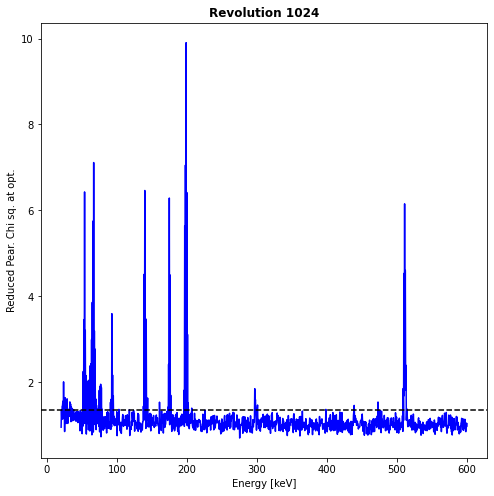

Bad Bins  [ 20.75  21.75  22.25  22.75  23.75  24.75  25.75  26.25  28.75  30.75
  32.75  33.75  34.75  35.25  36.25  38.25  47.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  73.75  74.75  75.75
  76.75  77.75  78.75  90.75  91.75  92.75  93.75  94.75 102.75 117.75
 123.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 160.75 172.75
 173.75 174.75 175.75 176.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 206.75 225.75 296.75 297.25 297.75 300.25 300.75 398.25 438.75
 472.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.75]
Count  90
Tolerance  104.39999999999999
Dof  [256. 256. 256. ... 256. 256. 256.]
Width  [0.08838835 0.08838835 0.08838835 ... 0.08838835 0.08838835 0.08838835]


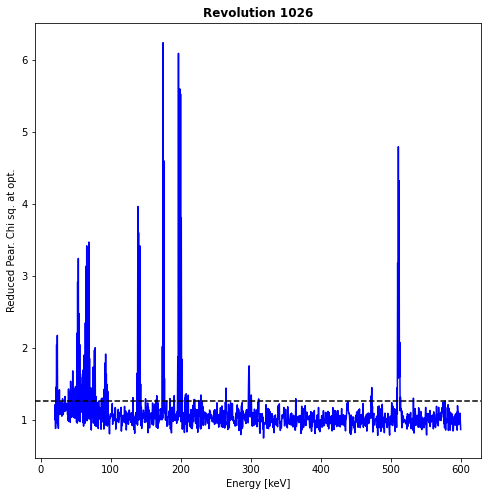

Bad Bins  [ 21.75  22.75  23.75  25.75  26.75  31.25  34.75  39.75  40.75  42.75
  43.75  44.75  45.75  46.75  48.75  49.75  50.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  73.75  74.75
  75.75  76.75  77.75  78.75  86.75  87.75  90.75  91.75  92.75  93.75
  94.75  95.75 131.75 137.75 138.75 139.75 140.75 141.75 142.75 149.75
 164.75 165.75 173.75 174.75 175.75 176.75 184.75 190.75 195.75 196.75
 197.75 198.75 199.75 200.75 201.75 205.75 206.75 207.75 210.75 218.75
 219.75 225.75 228.75 264.75 296.75 297.25 297.75 298.25 300.75 311.25
 364.25 471.75 472.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 513.75 532.25 577.25]
Count  104
Tolerance  104.39999999999999
Dof  [178. 178. 178. ... 178. 178. 178.]
Width  [0.10599979 0.10599979 0.10599979 ... 0.10599979 0.10599979 0.10599979]


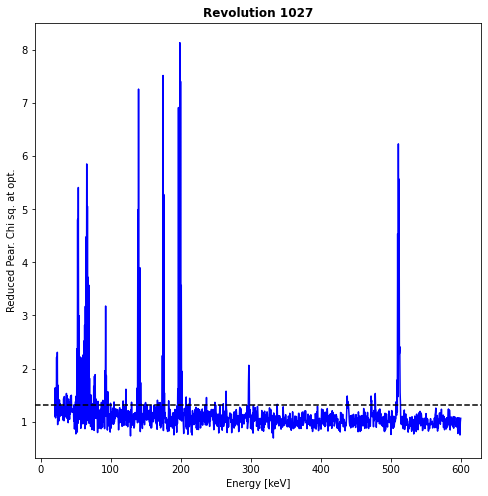

Bad Bins  [ 20.75  22.75  23.75  24.75  26.75  27.75  32.75  33.75  36.75  37.75
  39.75  41.75  42.75  43.75  47.75  49.75  50.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.25  66.75  67.75  68.75  69.75  70.75  71.75  74.75
  75.75  76.75  77.75  78.75  81.75  86.75  87.75  88.75  91.75  92.75
  93.75  94.75  95.75  99.75 104.75 117.75 121.75 129.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 148.75 149.75 166.75 169.25 170.75
 173.75 174.75 175.75 176.75 182.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 207.75 211.75 212.75 236.75 248.75 260.75 264.75 296.75
 297.25 297.75 337.75 437.75 438.75 439.25 471.75 472.25 472.75 477.75
 507.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25
 513.75]
Count  111
Tolerance  104.39999999999999
Dof  [191. 191. 191. ... 191. 191. 191.]
Width  [0.1023289 0.1023289 0.1023289 ... 0.1023289 0.1023289 0.1023289]


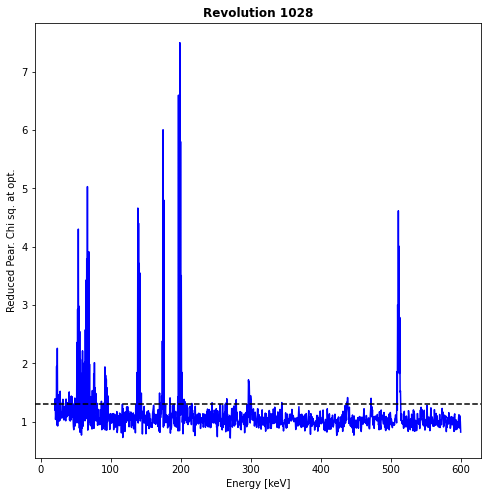

Bad Bins  [ 20.75  22.75  23.75  24.75  25.75  27.75  30.75  31.25  31.75  36.25
  38.75  40.25  40.75  42.75  43.75  44.75  45.75  48.75  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  73.75  74.75  75.75  76.75  77.75  78.75  80.75  86.75  89.75  91.75
  92.75  93.75  94.75  95.75 137.75 138.75 139.75 140.75 141.75 142.75
 143.75 169.75 170.75 172.75 173.75 174.75 175.75 184.75 195.75 196.75
 197.75 198.75 199.75 200.75 201.75 204.75 205.75 215.75 244.75 264.75
 265.75 279.25 296.75 297.25 297.75 298.25 299.75 300.25 344.25 344.75
 437.25 438.25 471.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 513.25 513.75]
Count  103
Tolerance  104.39999999999999
Dof  [1164. 1164. 1164. ... 1164. 1164. 1164.]
Width  [0.04145133 0.04145133 0.04145133 ... 0.04145133 0.04145133 0.04145133]


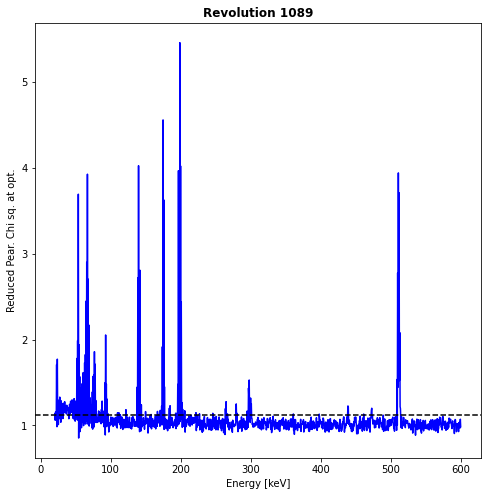

Bad Bins  [ 20.25  21.25  21.75  22.75  23.75  24.75  25.75  26.25  26.75  27.25
  28.25  29.25  29.75  30.25  31.25  32.25  32.75  33.25  33.75  34.25
  34.75  35.25  35.75  36.25  36.75  37.25  37.75  38.25  38.75  39.25
  39.75  40.75  41.25  41.75  42.25  42.75  43.25  43.75  44.25  44.75
  45.25  45.75  46.75  47.25  47.75  48.75  49.75  50.25  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.25
  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75  82.75
  83.75  84.75  85.75  86.75  87.75  89.75  90.75  91.75  92.75  93.75
  94.75  95.75 109.75 111.75 113.75 121.75 137.75 138.75 139.75 140.75
 141.75 142.75 143.75 149.75 157.75 166.75 167.75 168.75 170.75 172.75
 173.75 174.75 175.75 176.75 183.75 184.75 192.75 194.75 195.75 196.75
 197.75 198.75 199.75 200.75 201.75 202.75 205.75 221.75 226.75 245.75
 263.75 264.75 266.75 279.25 280.25 294.75 295.75 296.75 297.25 297

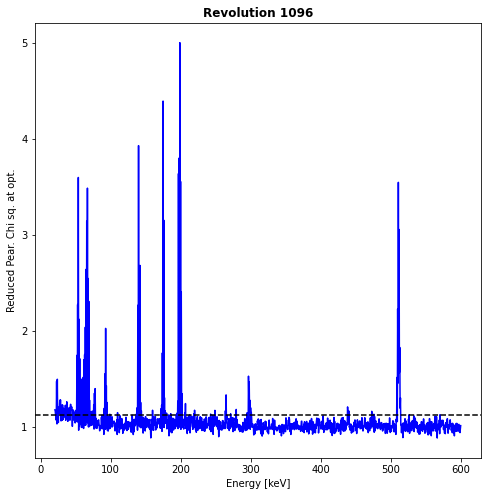

Bad Bins  [ 20.25  20.75  21.25  22.75  23.75  24.75  25.75  26.25  26.75  27.25
  27.75  28.25  29.25  30.25  31.25  32.25  33.25  33.75  34.25  35.25
  36.25  37.25  38.25  39.75  40.25  40.75  41.25  42.25  42.75  43.25
  43.75  44.25  44.75  45.75  46.25  46.75  47.75  48.75  49.75  50.25
  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  71.75  72.75  73.75  74.75  75.75  76.75  77.75  87.75  90.75  91.75
  92.75  93.75  94.75  98.75 109.75 136.75 137.75 138.75 139.75 140.75
 141.75 142.75 143.75 159.75 171.75 172.75 173.75 174.75 175.75 176.75
 177.75 179.75 182.75 185.75 193.75 194.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 205.75 206.75 212.75 218.75 219.75 242.75 248.75
 263.75 264.75 271.25 279.25 294.75 296.75 297.25 297.75 298.25 298.75
 299.75 300.75 438.25 438.75 439.25 440.25 472.75 475.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 513.25 513.75 526.25 570

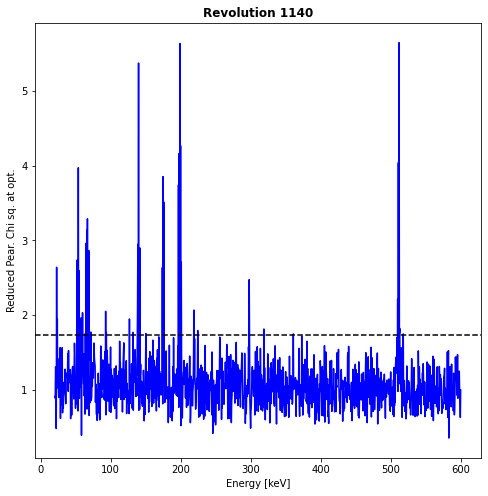

Bad Bins  [ 22.75  23.75  51.75  53.75  54.75  56.75  57.75  59.75  63.75  64.75
  65.75  66.75  67.75  68.75  71.75  92.75  93.75 126.75 131.75 138.25
 138.75 139.75 140.75 141.75 150.25 173.75 174.75 175.75 196.75 197.75
 198.75 199.75 200.75 218.75 224.25 297.75 318.75 360.75 509.75 510.75
 511.75 512.25 512.75 517.75]
Count  44
Tolerance  104.39999999999999
Dof  [86. 86. 86. ... 86. 86. 86.]
Width  [0.15249857 0.15249857 0.15249857 ... 0.15249857 0.15249857 0.15249857]


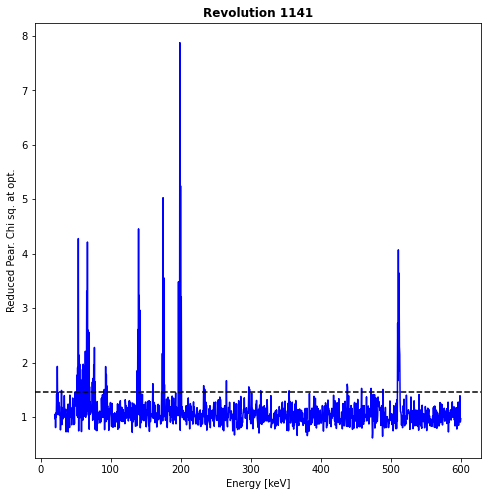

Bad Bins  [ 23.75  29.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75
  59.75  60.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  73.75  74.75  75.75  76.75  77.75  90.75  92.75  93.75  94.75 137.75
 138.75 139.75 140.75 141.75 160.25 172.75 173.75 174.75 175.75 176.75
 196.75 197.75 198.75 199.75 200.75 232.75 234.25 265.25 297.25 298.25
 314.25 354.75 437.75 438.25 458.25 471.75 488.75 509.75 510.25 510.75
 511.25 511.75 512.25 512.75]
Count  64
Tolerance  104.39999999999999
Dof  [555. 555. 555. ... 555. 555. 555.]
Width  [0.06003002 0.06003002 0.06003002 ... 0.06003002 0.06003002 0.06003002]


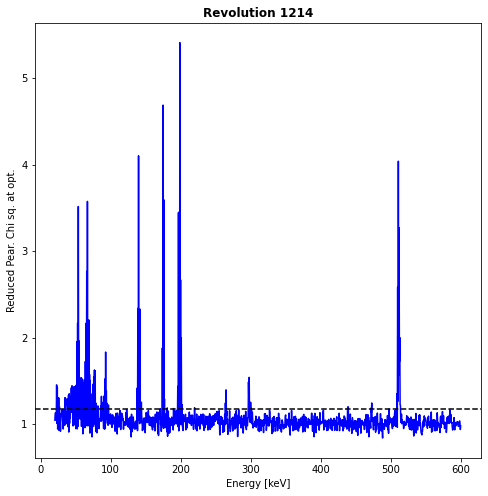

Bad Bins  [ 22.75  23.75  25.75  26.75  34.75  37.75  38.25  38.75  39.75  40.75
  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  81.75  85.75
  86.75  87.75  90.75  91.75  92.75  93.75  94.75  96.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 173.75 174.75 175.75 176.75 180.75
 189.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 219.75 263.75
 264.75 296.75 297.25 297.75 298.75 299.75 438.25 438.75 439.25 471.75
 472.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25
 513.75]
Count  101
Tolerance  104.39999999999999
Dof  [1151. 1151. 1151. ... 1151. 1151. 1151.]
Width  [0.04168476 0.04168476 0.04168476 ... 0.04168476 0.04168476 0.04168476]


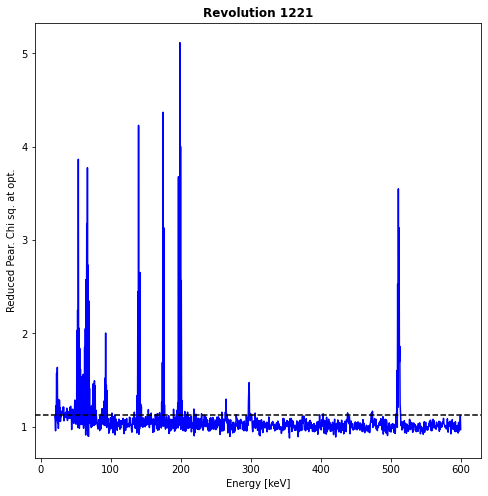

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  27.25  27.75  28.75  29.75
  30.25  30.75  31.25  31.75  32.25  32.75  35.25  35.75  37.25  37.75
  38.75  40.75  41.75  42.25  42.75  43.75  44.75  45.75  46.75  47.75
  48.25  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75
  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75
  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75
  77.75  78.75  86.75  87.75  90.75  91.75  92.75  93.75  94.75 101.75
 133.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 153.75 157.75
 163.75 164.75 166.75 169.75 172.75 173.75 174.75 175.75 176.75 189.75
 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 205.75 208.75
 209.75 218.75 221.75 229.75 258.75 263.75 264.75 265.75 279.25 296.75
 297.25 297.75 298.75 301.25 306.25 398.25 403.25 438.25 472.25 473.75
 507.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25
 513.75]
Count  131
Tolerance  104.39999999999999
Dof  [1125. 1125.

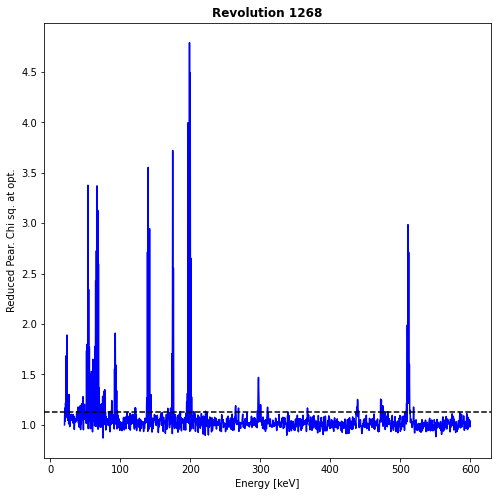

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  37.75  39.75  40.75
  42.75  43.75  44.75  46.75  47.75  48.75  49.75  50.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  73.75  74.75
  75.75  76.75  77.75  85.75  87.75  91.75  92.75  93.75  94.75  95.75
 120.75 121.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 167.75
 171.75 173.75 174.75 175.75 185.75 194.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 204.75 221.75 264.25 264.75 268.75 295.75 296.75
 297.25 297.75 298.25 299.75 300.25 300.75 310.25 367.25 437.75 438.25
 438.75 439.25 440.25 471.75 472.25 472.75 474.75 477.75 481.75 507.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.75 518.75]
Count  110
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


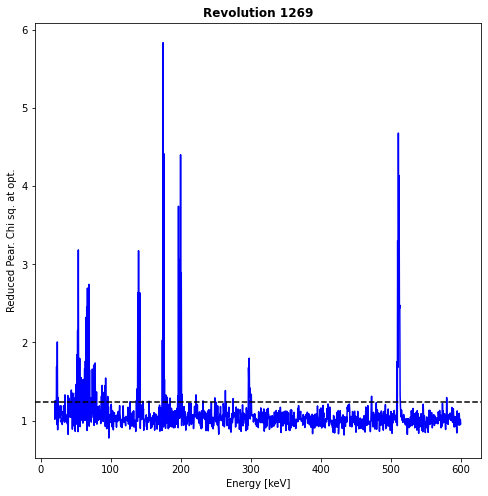

Bad Bins  [ 20.75  22.75  23.75  24.75  34.75  38.75  40.75  43.75  44.75  45.75
  46.75  47.75  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.25  74.75
  75.75  76.75  77.75  79.75  86.75  87.75  88.75  91.75  92.75  95.75
 127.75 136.75 137.75 138.75 139.75 140.75 141.75 145.75 154.75 173.75
 174.75 175.75 176.75 178.75 180.75 184.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 221.75 231.75 248.75 263.75 264.75 274.75 296.75
 297.25 297.75 298.25 298.75 299.75 300.75 472.25 472.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 513.25 579.75]
Count  98
Tolerance  104.39999999999999
Dof  [241. 241. 241. ... 241. 241. 241.]
Width  [0.0910975 0.0910975 0.0910975 ... 0.0910975 0.0910975 0.0910975]


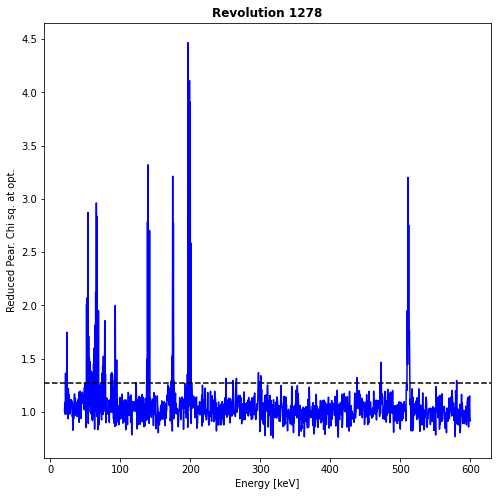

Bad Bins  [ 21.75  22.75  23.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  73.75  74.75  75.75  76.75  77.75  78.75  86.75  87.75  88.75
  91.75  92.75  93.75  94.75 122.25 137.75 138.75 139.75 140.75 141.75
 172.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75 198.75 199.75
 200.75 250.75 260.75 265.75 297.25 299.75 300.75 437.75 472.25 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 513.25 580.25]
Count  68
Tolerance  104.39999999999999
Dof  [1138. 1138. 1138. ... 1138. 1138. 1138.]
Width  [0.04192218 0.04192218 0.04192218 ... 0.04192218 0.04192218 0.04192218]


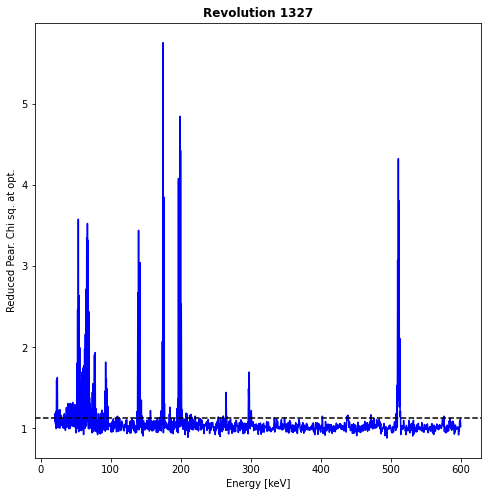

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  32.75
  33.75  34.75  36.75  37.75  38.75  39.75  40.75  41.75  42.75  43.75
  44.75  45.75  46.75  47.75  48.75  49.75  50.75  51.75  52.25  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.25  67.75  68.75  69.75  70.75  71.75
  73.75  74.75  75.75  76.75  77.75  78.75  79.75  82.75  85.75  86.75
  87.75  88.75  90.75  91.75  92.75  93.75  94.75  95.75 108.75 109.75
 137.75 138.75 139.75 140.75 141.75 142.75 143.75 144.75 154.75 155.75
 156.75 170.75 171.75 172.75 173.75 174.75 175.75 176.75 183.75 184.75
 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 207.75 208.75
 212.75 214.75 215.75 220.75 253.75 256.75 260.75 263.75 264.75 265.25
 265.75 296.75 297.25 297.75 298.25 298.75 299.75 300.75 333.75 348.25
 402.25 437.25 438.25 439.25 471.75 507.75 508.75 509.75 510.25 510.75
 511.25 511.75 512.25 512.75 513.25 513.75 575.75 584.25]
Count  13

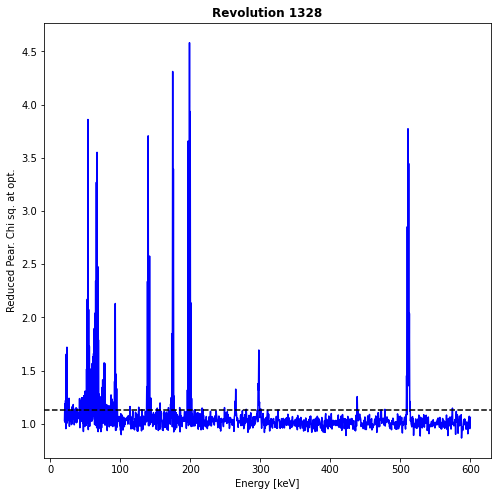

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  30.75  32.75  33.75
  36.75  37.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75
  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75
  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75
  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75
  79.75  80.75  83.75  84.75  85.75  86.75  87.75  90.75  91.75  92.75
  93.75  94.75 113.75 126.25 130.75 137.75 138.75 139.75 140.75 141.75
 142.75 143.75 152.75 155.75 156.75 168.75 171.75 172.75 173.75 174.75
 175.75 176.75 177.75 184.75 185.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 205.75 206.75 216.75 217.75 248.75 263.75 264.75 279.75
 295.75 296.75 297.25 297.75 298.25 298.75 300.25 300.75 310.25 325.25
 438.25 472.25 472.75 477.75 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 513.75 574.25]
Count  124
Tolerance  104.39999999999999
Dof  [267. 267. 267. ... 267. 267. 267.]
Width  [0.08654846 0.08654

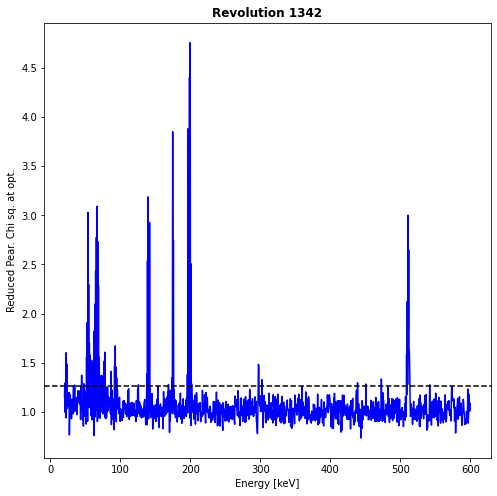

Bad Bins  [ 20.75  22.75  23.75  33.25  34.75  44.75  47.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.25  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75
  74.25  74.75  75.75  76.75  77.75  86.75  91.75  92.75  93.75  94.75
 125.75 137.75 138.75 139.75 140.75 141.75 153.75 168.75 173.75 174.75
 175.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 297.25 297.75
 302.25 438.75 450.75 472.75 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 513.25 541.75 573.25]
Count  75
Tolerance  104.39999999999999
Dof  [1229. 1229. 1229. ... 1229. 1229. 1229.]
Width  [0.04034029 0.04034029 0.04034029 ... 0.04034029 0.04034029 0.04034029]


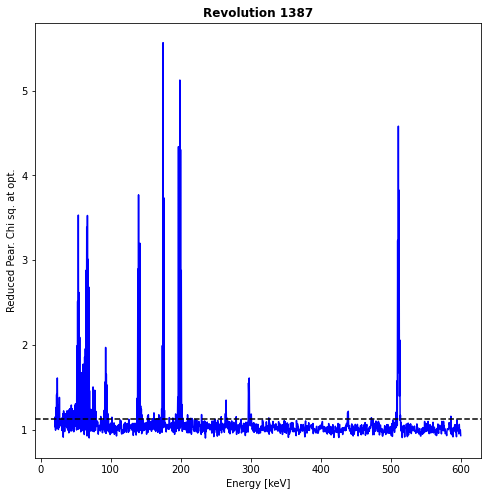

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  29.75  30.75  31.75
  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75  40.75  41.75
  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  72.75  73.75  74.75  75.75  76.75  77.75  78.75  85.75  90.75  91.75
  92.75  93.75  94.75  95.75  96.75 101.75 125.75 137.75 138.75 139.75
 140.75 141.75 142.75 143.75 144.75 152.75 153.75 154.75 159.75 161.75
 162.75 165.75 167.75 168.75 171.75 172.75 173.75 174.75 175.75 176.75
 183.75 188.75 192.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 202.75 209.75 210.75 211.75 213.75 215.75 229.75 257.75 263.75
 264.75 265.75 279.25 286.25 296.75 297.25 297.75 298.25 298.75 299.75
 300.25 300.75 325.75 438.25 438.75 439.25 472.25 506.75 507.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.75 585.75]
Co

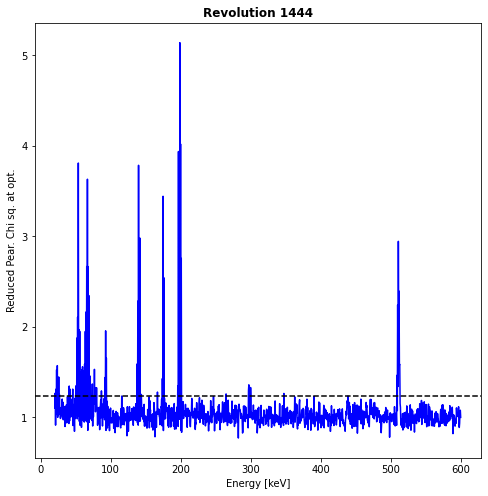

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  40.75  41.75  45.75
  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  70.75  73.75  76.75  77.75  79.75  86.75  91.75  92.75  93.75 115.75
 137.75 138.75 139.75 140.75 141.75 143.75 166.75 173.75 174.75 175.75
 195.75 196.75 197.75 198.75 199.75 200.75 264.75 296.75 297.25 297.75
 299.75 347.25 438.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75]
Count  71
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


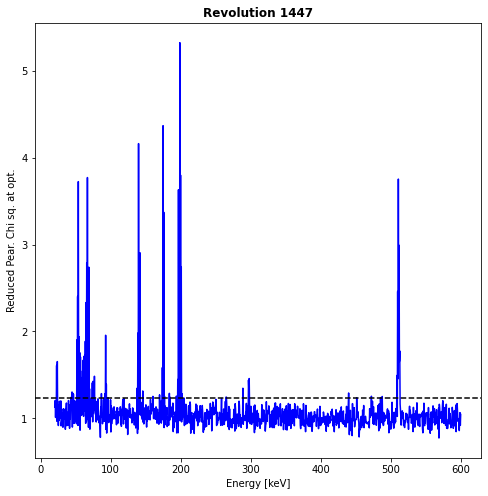

Bad Bins  [ 22.75  23.75  43.25  44.75  45.75  46.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  73.75  74.75  75.75  76.75  86.75
  91.75  92.75  93.75  96.25 137.75 138.75 139.75 140.75 141.75 145.75
 160.25 169.75 173.75 174.75 175.75 176.75 183.75 184.75 193.75 195.75
 196.75 197.75 198.75 199.75 200.75 201.75 264.75 265.25 288.75 296.75
 297.25 297.75 439.75 451.25 472.25 485.25 487.75 508.75 509.75 510.25
 510.75 511.25 511.75 512.25 512.75]
Count  75
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761505 0.07761505 ... 0.07761505 0.07761505 0.07761505]


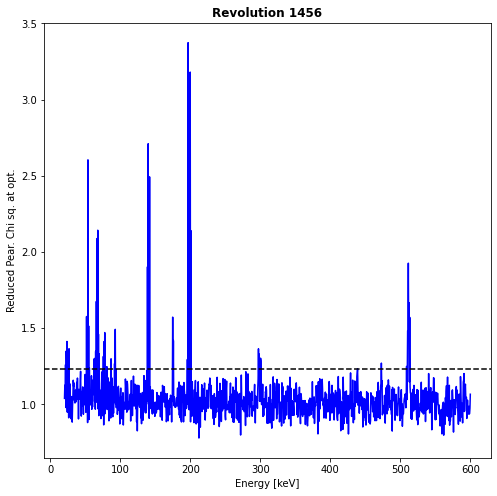

Bad Bins  [ 21.75  22.75  23.75  26.75  51.75  52.75  53.75  54.75  55.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  75.75  76.75  77.75
  80.75  86.75  91.75  92.75 138.75 139.75 140.75 141.75 174.75 175.75
 195.75 196.75 197.75 198.75 199.75 200.75 297.25 298.25 300.25 300.75
 438.75 472.75 508.75 510.25 510.75 511.25 511.75 512.25 513.25]
Count  49
Tolerance  104.39999999999999
Dof  [904. 904. 904. ... 904. 904. 904.]
Width  [0.04703604 0.04703604 0.04703604 ... 0.04703604 0.04703604 0.04703604]


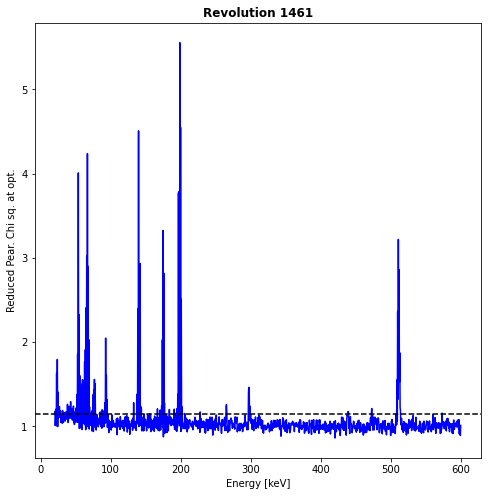

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.25  28.25  31.25
  32.75  33.25  35.25  37.25  38.25  40.75  42.75  43.75  44.75  46.75
  48.75  49.25  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75
  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75
  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75
  77.75  79.75  84.75  86.75  87.75  89.75  91.75  92.75  93.75  94.75
 132.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 147.75 155.75
 166.75 170.75 172.75 173.75 174.75 175.75 176.75 178.75 183.75 190.75
 192.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 205.75
 227.75 264.75 265.25 265.75 296.75 297.25 297.75 298.75 438.75 439.25
 472.25 472.75 507.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 513.25 513.75 573.25]
Count  114
Tolerance  104.39999999999999
Dof  [1294. 1294. 1294. ... 1294. 1294. 1294.]
Width  [0.03931406 0.03931406 0.03931406 ... 0.03931406 0.03931406 0.03931406]


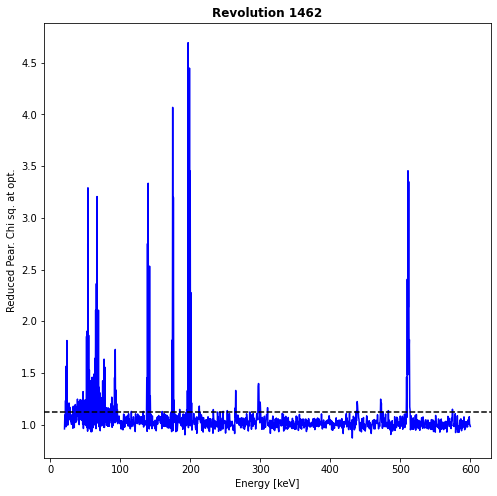

Bad Bins  [ 21.75  22.75  23.75  25.75  26.75  27.75  32.75  34.75  35.75  36.75
  37.75  38.75  39.75  40.75  41.75  42.75  43.75  44.75  45.75  46.75
  47.75  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75
  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75
  67.75  68.75  69.75  70.75  72.75  73.75  74.75  75.75  76.75  77.75
  78.75  79.75  80.75  82.75  83.75  86.75  87.75  88.75  89.75  90.75
  91.75  92.75  93.75  94.75  95.75 115.75 132.75 137.75 138.75 139.75
 140.75 141.75 142.75 159.75 172.75 173.75 174.75 175.75 176.75 184.75
 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 212.75 232.75
 238.75 242.75 246.75 252.75 263.75 264.75 284.75 296.75 297.25 297.75
 298.75 299.75 300.25 310.25 436.75 438.25 438.75 439.75 471.75 472.25
 472.75 475.25 482.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 513.25 513.75 574.25]
Count  124
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761

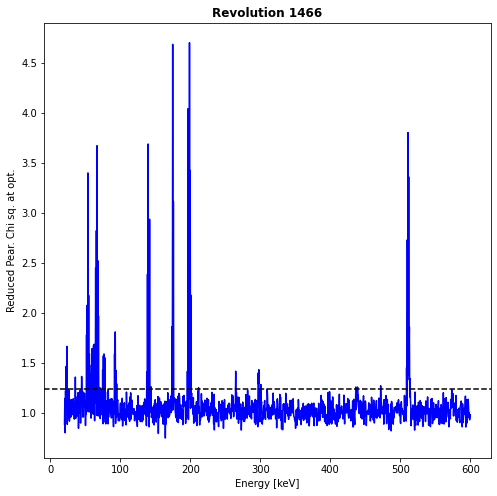

Bad Bins  [ 22.75  23.75  35.75  44.75  51.75  52.75  53.75  54.75  55.75  56.25
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  70.75  74.75  75.75  76.75  77.75  91.75  92.75
  93.75  94.75 137.75 138.75 139.75 140.75 141.75 143.75 173.75 174.75
 175.75 195.75 196.75 197.75 198.75 199.75 200.75 211.75 264.75 296.75
 297.25 297.75 300.75 309.75 436.25 438.75 471.75 508.75 509.75 510.25
 510.75 511.25 511.75 512.25 512.75 513.75]
Count  66
Tolerance  104.39999999999999
Dof  [280. 280. 280. ... 280. 280. 280.]
Width  [0.08451543 0.08451543 0.08451543 ... 0.08451543 0.08451543 0.08451543]


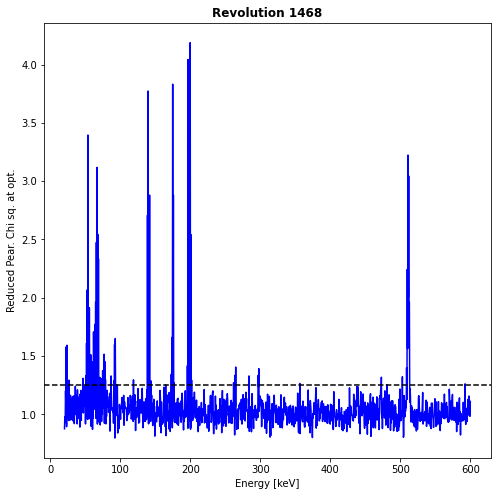

Bad Bins  [ 22.75  23.75  26.75  46.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  61.75  62.75  63.75  64.75  65.75  66.75
  67.75  68.75  69.75  70.75  72.75  73.75  74.75  75.75  76.75  77.75
  78.75  86.75  90.75  91.75  92.75 118.75 138.75 139.75 140.75 141.75
 143.75 164.75 172.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 261.75 263.75 264.75 283.75 296.75 297.75
 356.25 472.75 480.75 502.75 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 592.25]
Count  73
Tolerance  104.39999999999999
Dof  [9. 9. 9. ... 9. 9. 9.]
Width  [0.47140452 0.47140452 0.47140452 ... 0.47140452 0.47140452 0.47140452]


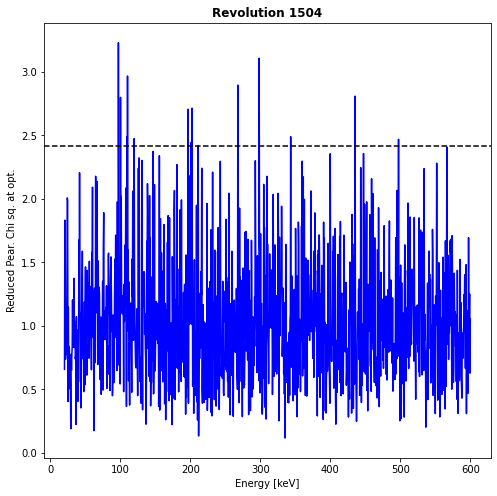

Bad Bins  [ 97.25 100.25 109.25 110.25 119.75 196.75 200.75 202.25 211.25 267.75
 298.25 343.25 435.25 497.25]
Count  14
Tolerance  104.39999999999999
Dof  [9. 9. 9. ... 9. 9. 9.]
Width  [0.47140452 0.47140452 0.47140452 ... 0.47140452 0.47140452 0.47140452]


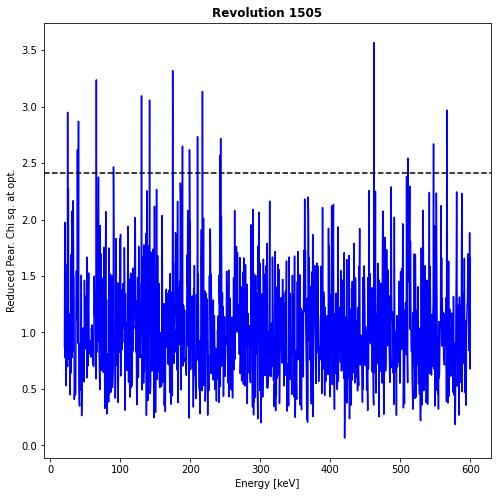

Bad Bins  [ 24.75  38.75  40.25  65.75  90.25 130.25 141.75 174.75 188.75 198.75
 210.25 217.25 242.25 243.25 462.25 510.75 547.25 566.25]
Count  18
Tolerance  104.39999999999999
Dof  [618. 618. 618. ... 618. 618. 618.]
Width  [0.05688801 0.05688801 0.05688801 ... 0.05688801 0.05688801 0.05688801]


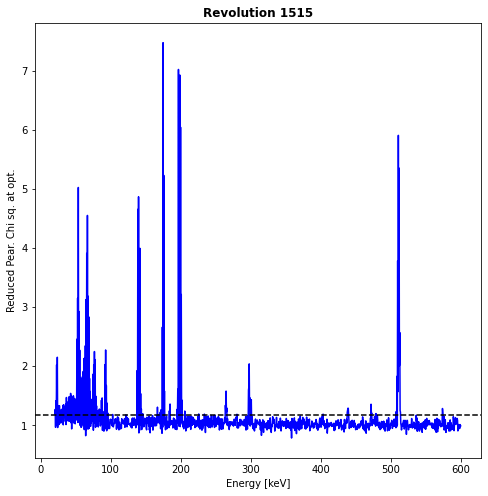

Bad Bins  [ 20.25  20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75
  29.75  30.75  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.25
  38.75  39.75  40.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75
  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75
  78.75  79.75  80.75  82.75  83.75  84.75  85.75  86.75  87.75  88.75
  89.75  90.75  91.75  92.75  93.75  94.75  95.75 102.75 121.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 145.75 166.75 168.75 170.75
 171.75 172.75 173.75 174.75 175.75 176.75 183.75 184.75 194.75 195.75
 196.75 197.75 198.75 199.75 200.75 201.75 205.75 225.75 233.75 263.75
 264.25 264.75 265.25 265.75 280.25 296.75 297.25 297.75 298.25 298.75
 299.75 300.25 300.75 403.25 437.75 438.25 438.75 439.25 439.75 471.75
 472.25 472.75 478.75 507.75 508.75 509.75 510.25 510.75 511.25 511

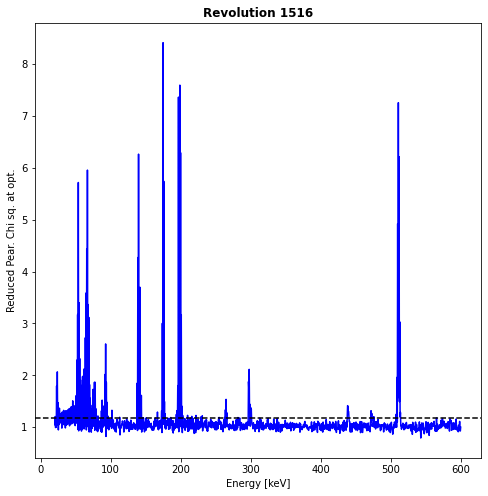

Bad Bins  [ 20.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75  30.75
  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75  40.75
  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75  81.75
  86.75  87.75  89.75  90.75  91.75  92.75  93.75  94.75  95.75 101.75
 112.75 137.75 138.75 139.75 140.75 141.75 142.75 143.75 145.75 146.75
 150.75 163.75 166.75 172.75 173.75 174.25 174.75 175.75 176.75 177.75
 185.75 193.75 194.75 195.75 196.75 197.75 198.25 198.75 199.75 200.75
 201.75 202.75 209.75 213.75 215.75 221.75 228.75 230.75 254.75 262.75
 263.75 264.75 265.75 281.75 284.25 296.75 297.25 297.75 298.25 298.75
 299.75 300.25 300.75 312.75 437.75 438.25 438.75 439.25 439.75 471.75
 472.75 475.75 507.75 508.75 509.75 510.25 510.75 511.25 511.75 512

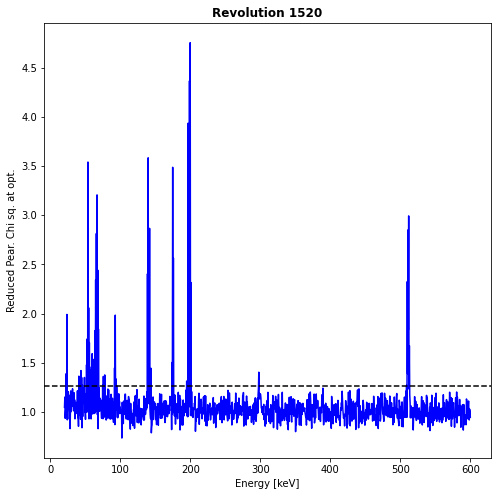

Bad Bins  [ 22.75  23.75  40.75  41.75  43.75  44.75  45.75  48.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  74.75  75.75  76.75  77.75
  91.75  92.75  93.75  94.75 138.75 139.75 140.75 141.75 143.75 173.75
 174.75 175.75 194.75 196.75 197.75 198.75 199.75 200.75 297.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.75]
Count  56
Tolerance  104.39999999999999
Dof  [241. 241. 241. ... 241. 241. 241.]
Width  [0.0910975 0.0910975 0.0910975 ... 0.0910975 0.0910975 0.0910975]


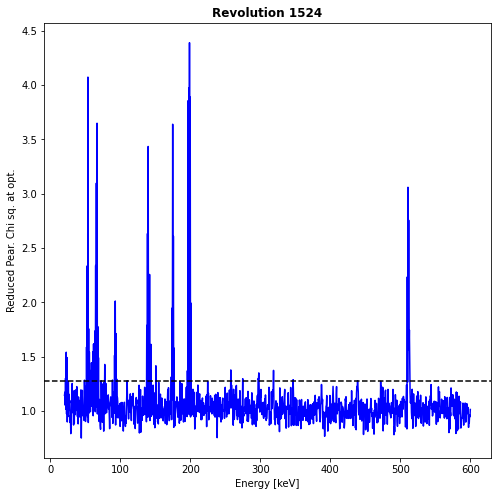

Bad Bins  [ 21.75  22.75  23.75  48.75  51.75  52.75  53.75  54.75  55.75  56.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  72.75  77.75  88.75  91.75  92.75  93.75  94.75 109.75 137.75
 138.75 139.75 140.75 141.75 143.75 150.75 172.75 173.75 174.75 175.75
 176.75 185.25 195.75 196.75 197.75 198.75 199.75 200.75 257.75 274.75
 296.75 297.25 297.75 318.75 346.75 438.75 509.75 510.75 511.25 511.75
 512.25 512.75 513.25]
Count  63
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


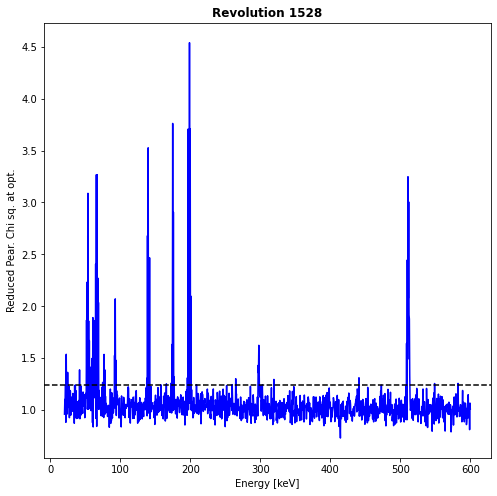

Bad Bins  [ 21.75  22.75  23.75  24.75  35.75  41.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  74.75  76.75  77.75  91.75  92.75  93.75
 137.75 138.75 139.75 140.75 141.75 157.75 165.75 172.75 173.75 174.75
 175.75 176.75 195.75 196.75 197.75 198.75 199.75 200.75 208.75 259.75
 264.75 296.75 297.25 297.75 298.25 302.75 319.25 440.75 472.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25 548.75 582.25]
Count  70
Tolerance  104.39999999999999
Dof  [293. 293. 293. ... 293. 293. 293.]
Width  [0.08261924 0.08261924 0.08261924 ... 0.08261924 0.08261924 0.08261924]


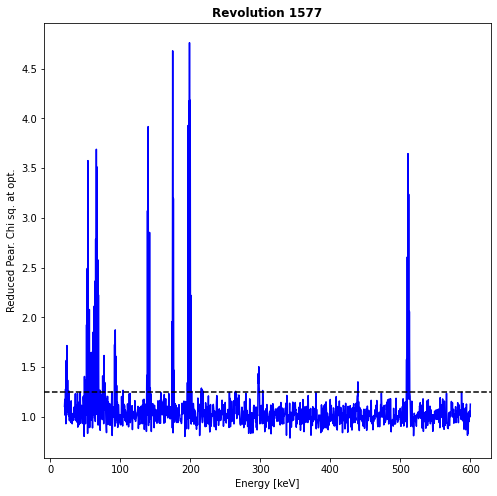

Bad Bins  [ 21.75  22.75  23.75  24.75  26.75  48.75  50.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  70.75  74.75  75.75  76.75  77.75
  87.75  91.75  92.75  93.75  94.75 103.75 137.75 138.75 139.75 140.75
 141.75 142.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 215.75 216.75 217.75 263.75 264.75 296.75 297.25
 297.75 298.25 303.25 439.25 508.75 509.75 510.25 510.75 511.25 511.75
 512.75 587.25]
Count  72
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


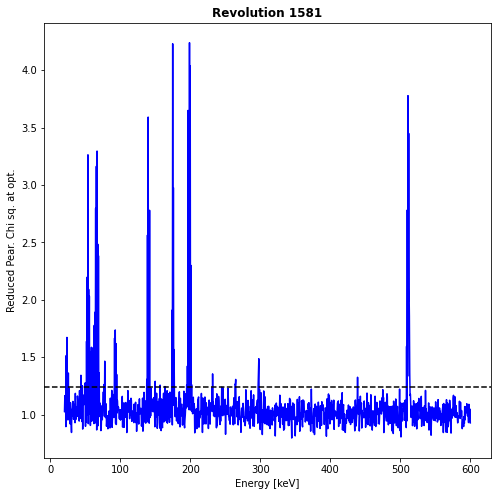

Bad Bins  [ 22.75  23.75  25.75  43.75  45.75  49.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  76.75  77.75  91.75  92.75  93.75
  94.75 137.75 138.75 139.75 140.75 141.75 149.75 156.75 163.75 173.75
 174.75 175.75 176.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 231.75 244.75 263.75 264.25 264.75 296.75 297.25 297.75 438.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25]
Count  69
Tolerance  104.39999999999999
Dof  [345. 345. 345. ... 345. 345. 345.]
Width  [0.0761387 0.0761387 0.0761387 ... 0.0761387 0.0761387 0.0761387]


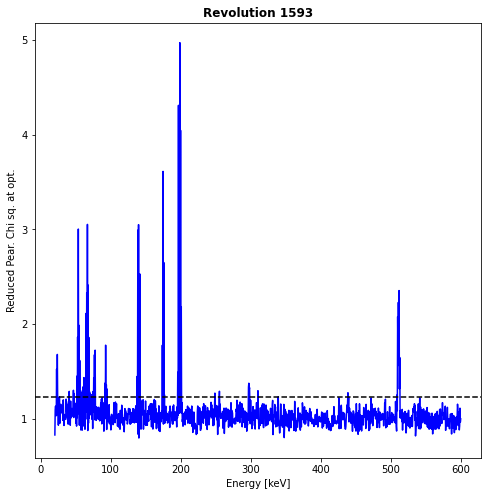

Bad Bins  [ 22.75  23.75  26.75  40.75  46.75  47.75  51.75  52.75  53.75  54.75
  55.75  56.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  72.75  74.75  75.75  76.75  77.75
  91.75  92.75  93.75  94.75 137.75 138.75 139.75 140.75 141.75 173.75
 174.75 175.75 176.75 195.75 196.75 197.75 198.75 199.75 200.75 248.75
 255.25 296.75 297.25 297.75 298.25 310.25 339.25 438.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75]
Count  66
Tolerance  104.39999999999999
Dof  [306. 306. 306. ... 306. 306. 306.]
Width  [0.08084521 0.08084521 0.08084521 ... 0.08084521 0.08084521 0.08084521]


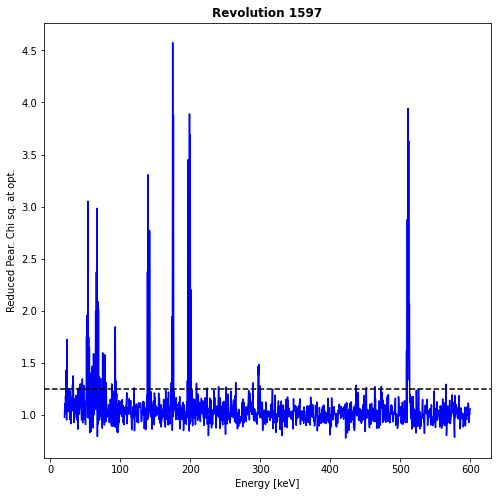

Bad Bins  [ 22.75  23.75  26.75  31.75  32.75  39.75  42.75  43.75  45.75  47.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  71.75
  73.75  74.75  75.75  76.75  77.75  79.75  87.75  92.75  93.75 119.75
 138.75 139.75 140.75 141.75 172.75 173.75 174.75 175.75 195.75 196.75
 197.75 198.75 199.75 200.75 208.75 223.75 240.25 250.75 264.75 289.25
 296.75 297.25 297.75 299.75 317.25 436.75 451.25 463.25 472.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75 525.75 565.25]
Count  79
Tolerance  104.39999999999999
Dof  [670. 670. 670. ... 670. 670. 670.]
Width  [0.05463584 0.05463584 0.05463584 ... 0.05463584 0.05463584 0.05463584]


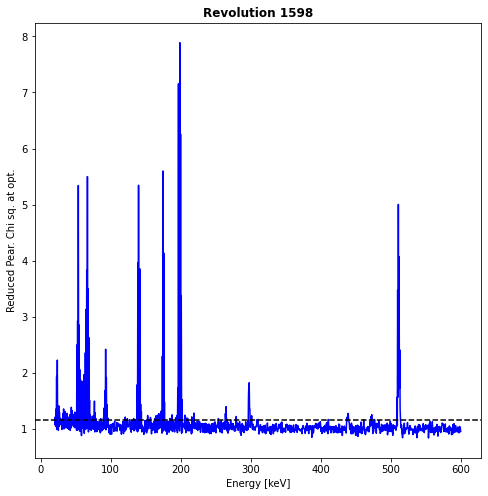

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  29.75  31.75
  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75  40.75  41.75
  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  73.75
  74.75  75.75  76.75  77.75  78.75  85.75  89.75  90.75  91.75  92.75
  93.75  94.75  95.75 120.75 123.75 126.75 132.75 135.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 152.75 156.75 162.75 163.75 164.75
 166.75 167.75 168.75 169.75 170.75 171.75 172.25 172.75 173.75 174.75
 175.75 176.75 184.75 187.75 192.75 194.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 205.75 206.75 207.75 209.75 215.75 218.75 253.75
 263.75 264.75 265.75 279.25 296.75 297.25 297.75 298.25 298.75 301.25
 308.75 309.75 310.25 410.75 437.25 437.75 438.75 439.25 439.75 461.25
 471.75 472.25 472.75 476.75 508.75 509.75 510.25 510.75 511.25 511

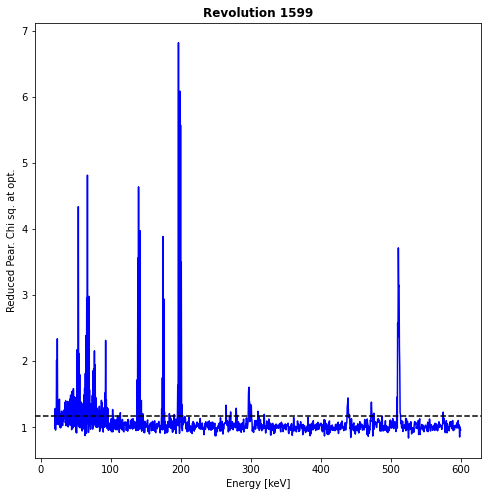

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  28.75  29.75  30.75
  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75  40.75  41.75
  42.75  43.25  43.75  44.75  45.25  45.75  46.75  47.75  48.75  49.75
  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.25  67.75  68.75
  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75
  79.75  80.75  81.75  82.75  83.75  85.75  86.75  87.75  88.75  89.75
  90.75  91.75  92.75  93.75  94.75  95.75 102.75 103.75 109.75 113.75
 137.75 138.75 139.75 140.75 141.75 142.75 143.75 145.75 172.75 173.75
 174.75 175.75 176.75 183.75 184.75 190.75 195.25 195.75 196.75 197.75
 198.75 199.25 199.75 200.75 201.75 264.75 271.25 278.75 279.25 280.25
 296.75 297.25 297.75 298.25 299.25 299.75 300.75 310.25 319.25 437.75
 438.25 438.75 439.25 440.75 471.75 472.25 472.75 473.75 475.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25 513.75 574

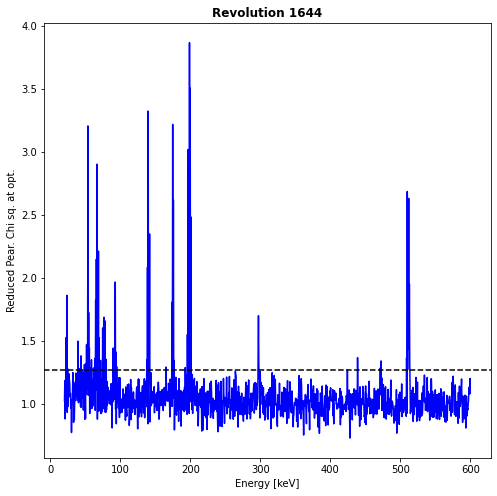

Bad Bins  [ 22.75  23.75  24.75  39.75  40.75  43.75  45.75  48.75  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  58.75  61.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  71.75  74.75  75.75  76.75  77.75  79.75
  89.75  92.75  93.75  94.75 137.75 138.75 139.75 140.75 141.75 165.25
 173.75 174.75 175.75 176.75 192.75 195.75 196.75 197.75 198.75 199.75
 200.75 296.75 297.25 297.75 424.25 438.75 471.25 472.25 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 513.25]
Count  67
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761505 0.07761505 ... 0.07761505 0.07761505 0.07761505]


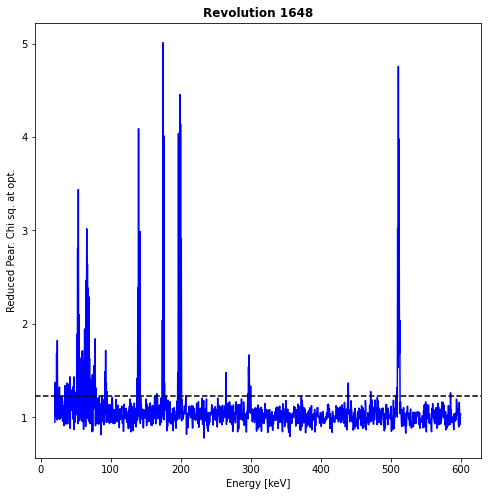

Bad Bins  [ 20.75  22.75  23.75  25.75  26.75  34.75  36.75  37.75  39.75  40.75
  41.75  44.75  45.75  47.75  48.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  73.75  74.75  75.75  76.75
  77.75  78.75  87.75  91.75  92.75  93.75  94.75 137.75 138.75 139.75
 140.75 141.75 165.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75
 198.75 199.75 200.75 264.75 295.75 296.75 297.25 297.75 299.75 439.25
 471.25 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 585.25]
Count  80
Tolerance  104.39999999999999
Dof  [228. 228. 228. ... 228. 228. 228.]
Width  [0.09365858 0.09365858 0.09365858 ... 0.09365858 0.09365858 0.09365858]


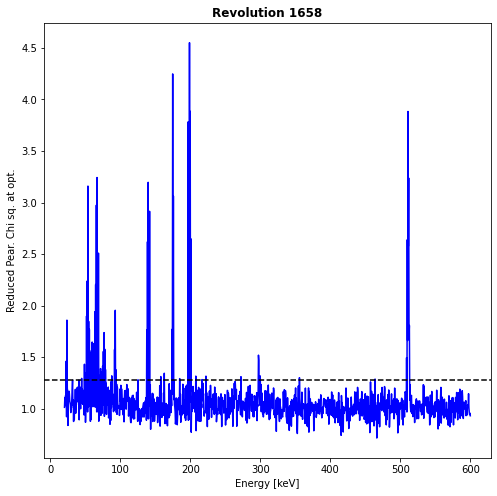

Bad Bins  [ 22.75  23.75  44.75  48.75  49.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  71.75  73.75  74.75  75.75  76.75  77.75
  78.75  87.75  91.75  92.75  93.75 137.75 138.75 139.75 140.75 141.75
 157.75 162.75 173.75 174.75 175.75 184.75 196.75 197.75 198.75 199.75
 200.75 207.75 216.75 222.25 272.25 297.25 297.75 299.75 355.75 463.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75]
Count  68
Tolerance  104.39999999999999
Dof  [644. 644. 644. ... 644. 644. 644.]
Width  [0.05572782 0.05572782 0.05572782 ... 0.05572782 0.05572782 0.05572782]


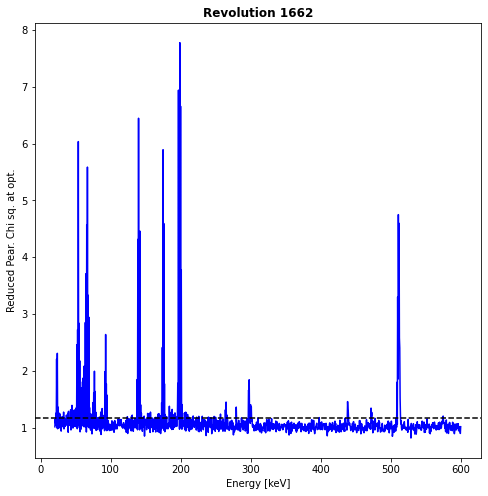

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  27.75  30.75  32.75  33.75
  36.75  37.75  38.75  39.75  42.75  43.75  44.75  45.75  46.75  47.75
  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  70.75  71.75  74.75  75.75  76.75  77.75  78.75  81.75
  83.75  84.75  85.75  86.75  87.75  88.75  90.75  91.75  92.75  93.75
  94.75 123.75 129.75 130.75 137.75 138.75 139.75 140.75 141.75 142.75
 143.75 145.75 146.75 147.75 152.75 154.75 156.75 159.75 163.75 165.75
 166.75 167.75 168.75 170.75 171.75 172.75 173.75 174.75 175.75 176.75
 177.75 179.75 183.75 184.75 187.75 188.75 191.75 192.75 193.75 194.75
 195.25 195.75 196.75 197.75 198.75 199.75 200.75 201.75 205.25 205.75
 206.75 207.75 209.75 211.75 217.75 222.75 225.75 230.75 238.75 239.75
 241.75 243.75 247.75 249.75 256.75 263.75 264.75 265.75 279.25 286.75
 296.75 297.25 297.75 298.25 298.75 299.75 300.75 310.25 397.75 434

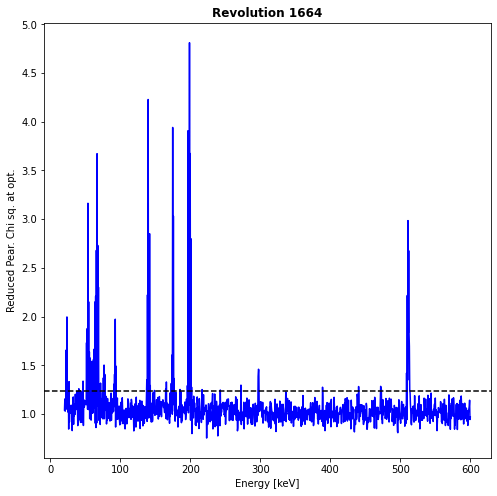

Bad Bins  [ 22.75  23.75  25.75  26.75  38.25  40.75  42.75  46.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  71.75  75.75  76.75
  77.75  90.75  91.75  92.75  93.75 137.75 138.75 139.75 140.75 141.75
 142.75 148.75 164.75 165.75 172.75 173.75 174.75 175.75 176.75 185.25
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 216.75 242.75 272.25
 296.75 297.25 297.75 388.75 440.25 471.75 472.25 472.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75 513.25]
Count  77
Tolerance  104.39999999999999
Dof  [358. 358. 358. ... 358. 358. 358.]
Width  [0.07474351 0.07474351 0.07474351 ... 0.07474351 0.07474351 0.07474351]


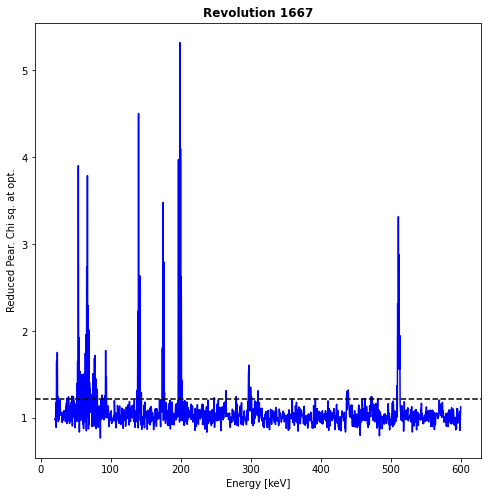

Bad Bins  [ 22.75  23.75  24.75  37.75  39.75  44.75  46.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  73.75  74.75  75.75
  76.75  77.75  78.75  80.75  87.75  89.75  91.75  92.75  93.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 173.75 174.75 175.75 176.75
 196.75 197.75 198.75 199.75 200.75 201.75 247.75 264.75 279.25 296.75
 297.25 298.25 299.75 300.75 301.25 310.25 436.75 437.25 438.25 438.75
 439.25 462.75 471.75 472.75 481.25 508.75 509.75 510.25 510.75 511.25
 511.75 512.25 512.75]
Count  83
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761505 0.07761505 ... 0.07761505 0.07761505 0.07761505]


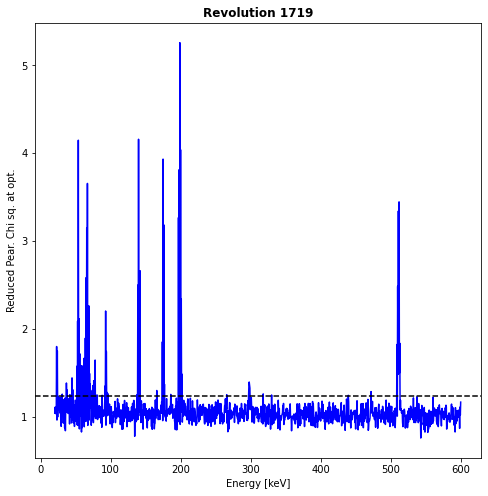

Bad Bins  [ 22.75  23.75  30.75  36.75  37.75  41.75  44.75  45.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  73.75
  74.75  75.75  76.75  77.75  78.75  80.75  87.75  91.75  92.75  93.75
  94.75  95.75 137.75 138.75 139.75 140.75 141.75 165.75 173.75 174.75
 175.75 176.75 185.75 196.75 197.75 198.75 199.75 200.75 201.75 265.75
 297.25 297.75 298.25 298.75 317.75 329.75 439.25 471.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75]
Count  76
Tolerance  104.39999999999999
Dof  [657. 657. 657. ... 657. 657. 657.]
Width  [0.05517373 0.05517373 0.05517373 ... 0.05517373 0.05517373 0.05517373]


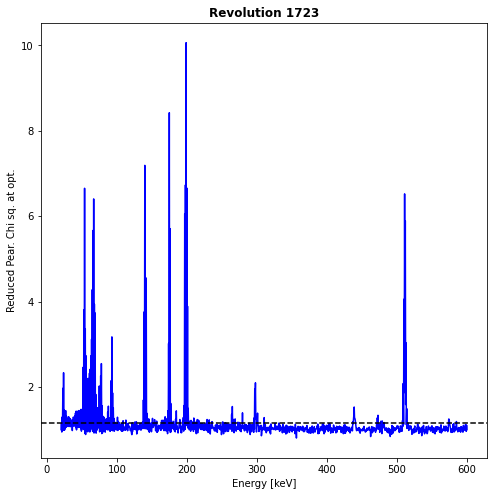

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  30.75  31.75
  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75  40.75  41.75
  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75
  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75  80.75  81.75
  83.75  84.75  85.75  86.75  87.75  88.75  89.75  90.75  91.75  92.75
  93.75  94.75  95.75  97.75 100.75 101.75 102.75 108.75 112.75 125.75
 127.75 136.25 137.75 138.75 139.75 140.75 141.75 142.75 143.75 145.75
 150.75 153.75 156.75 163.75 164.75 165.75 166.75 167.75 168.75 169.75
 170.75 171.75 172.75 173.75 174.75 175.75 176.75 177.75 180.75 183.75
 184.75 189.75 193.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 204.75 205.75 206.75 207.75 209.75 211.75 213.75 214.75 215.75
 216.75 228.75 231.75 235.75 250.75 251.75 263.75 264.75 265.75 268

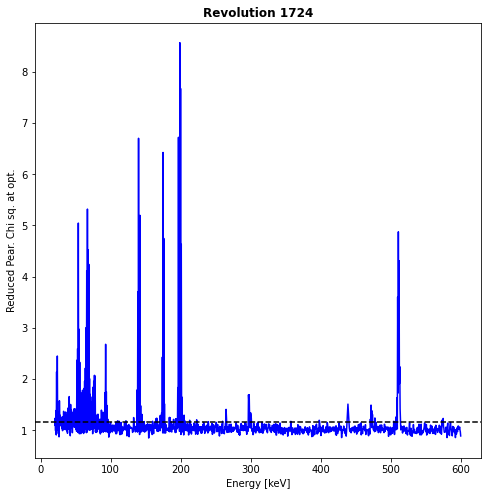

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75
  30.75  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75
  40.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75
  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75
  81.75  83.75  84.75  85.75  86.75  87.75  88.75  89.75  90.75  91.75
  92.75  93.75  94.75  95.75 109.75 111.75 121.75 132.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 144.75 147.75 159.75 164.75 165.75
 170.75 171.75 172.75 173.75 174.75 175.75 176.75 183.75 184.75 185.75
 189.75 192.75 193.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 204.75 205.75 212.75 222.75 259.75 264.75 265.25 296.75 297.25
 297.75 298.25 298.75 299.75 300.25 300.75 357.25 397.75 398.25 437.75
 438.25 438.75 439.25 439.75 470.75 471.75 472.25 472.75 473.75 477

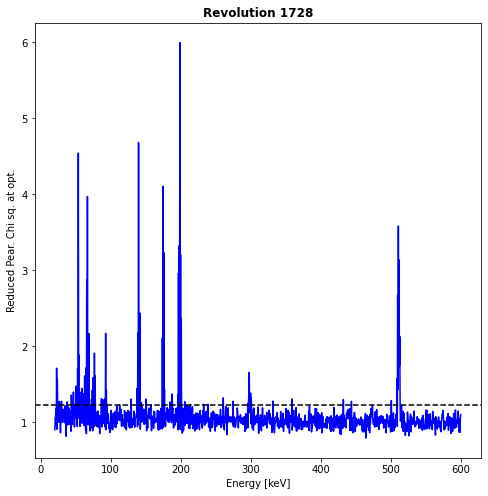

Bad Bins  [ 22.75  23.75  24.75  26.75  29.75  37.75  43.75  46.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  73.75  74.75
  75.75  76.75  77.75  86.75  88.75  91.75  92.75  93.75  94.75 129.25
 137.75 138.75 139.75 140.75 141.75 143.75 150.75 157.25 173.75 174.75
 175.75 176.75 184.75 187.75 195.75 196.75 197.75 198.75 199.75 200.75
 205.75 213.75 232.75 238.75 260.75 274.75 295.75 296.75 297.25 297.75
 298.25 298.75 299.75 300.75 331.75 358.75 432.25 443.75 500.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75]
Count  87
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


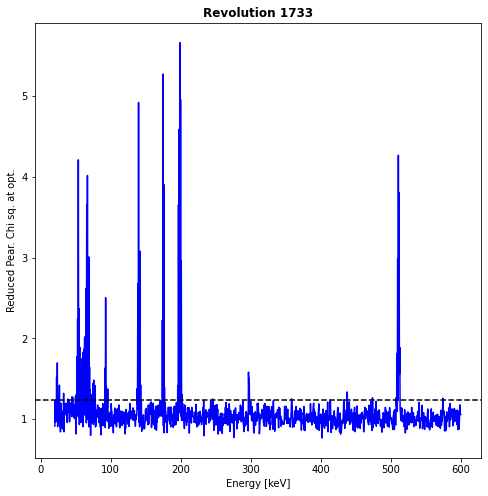

Bad Bins  [ 22.75  23.75  25.75  26.75  32.75  38.75  44.75  45.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  74.75  75.75  76.75  77.75  91.75  92.75  93.75  95.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 173.75 174.25 174.75 175.75
 176.75 195.75 196.75 197.25 197.75 198.75 199.75 200.75 201.75 245.75
 296.75 297.25 297.75 358.25 433.25 437.75 473.75 507.75 508.75 509.75
 510.75 511.25 511.75 512.25 512.75 574.25]
Count  76
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


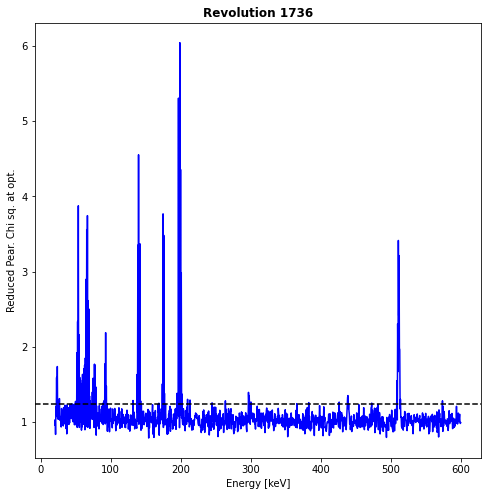

Bad Bins  [ 22.75  23.75  24.75  25.75  26.75  44.75  49.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  69.75  70.75  73.75  74.75  75.75
  76.75  77.75  78.75  88.75  90.75  91.75  92.75  93.75  94.75 131.75
 137.75 138.75 139.75 140.75 141.75 142.75 168.75 173.75 174.75 175.75
 176.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 209.75
 213.25 244.75 263.75 296.75 297.25 297.75 300.25 365.75 382.75 426.25
 438.25 438.75 439.75 472.75 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 513.75 573.75]
Count  84
Tolerance  104.39999999999999
Dof  [306. 306. 306. ... 306. 306. 306.]
Width  [0.08084521 0.08084521 0.08084521 ... 0.08084521 0.08084521 0.08084521]


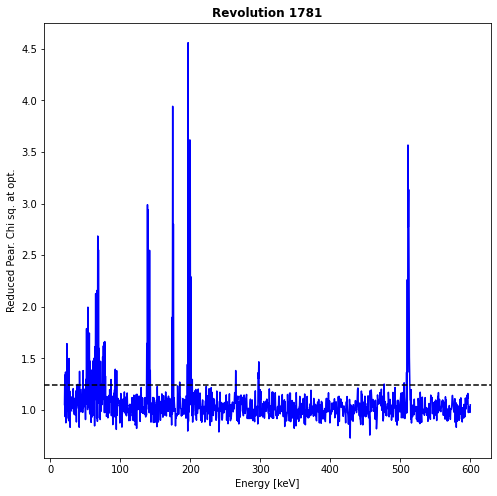

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  26.75  38.75  41.75  46.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.25  69.75  71.75
  72.75  74.75  75.75  76.75  77.75  78.75  86.75  92.75  93.75  94.75
 137.75 138.75 139.75 140.75 141.75 142.75 173.75 174.75 175.75 184.75
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 202.75 264.75 296.75
 297.25 297.75 476.75 505.25 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 513.25]
Count  73
Tolerance  104.39999999999999
Dof  [696. 696. 696. ... 696. 696. 696.]
Width  [0.05360563 0.05360563 0.05360563 ... 0.05360563 0.05360563 0.05360563]


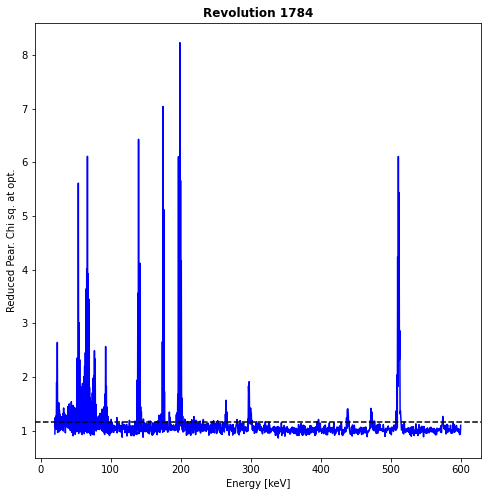

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  29.75  30.75
  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.25  39.75
  40.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75
  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75
  80.75  82.75  84.75  85.75  86.75  87.75  88.75  89.75  90.75  91.75
  92.75  93.75  94.75  95.75 100.75 108.75 126.75 134.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 146.75 154.75 156.75 165.75 167.75
 168.75 170.75 171.75 172.75 173.75 174.75 175.75 176.75 180.75 183.75
 184.75 193.75 194.75 195.75 196.75 197.75 198.75 199.25 199.75 200.75
 201.75 202.75 205.75 206.75 209.75 214.75 215.75 218.75 221.75 227.75
 232.25 246.75 251.75 252.75 262.75 263.75 264.25 264.75 265.75 280.25
 284.75 295.75 296.75 297.25 297.75 298.25 298.75 299.75 300.25 300

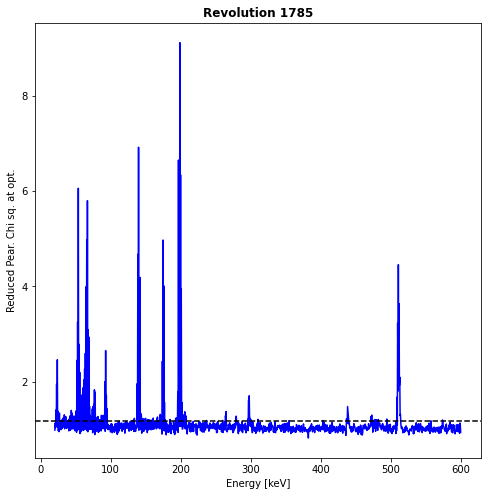

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  27.75  29.75  31.75  32.75
  33.75  35.75  37.75  39.75  40.75  41.75  42.75  43.75  44.75  45.75
  46.75  47.75  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75
  76.75  77.75  78.75  81.75  83.75  84.75  85.75  86.75  87.75  88.75
  89.75  90.75  91.75  92.75  93.75  94.75 130.75 132.75 133.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 145.75 147.75 149.75 152.75
 154.75 157.75 160.75 165.75 166.75 170.75 172.75 173.75 174.75 175.75
 176.75 177.75 184.75 192.75 193.75 194.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 204.75 205.75 206.75 207.75 236.75 259.75 263.75
 264.25 264.75 279.25 295.75 296.75 297.25 297.75 298.25 298.75 299.75
 310.25 354.75 403.25 436.75 437.75 438.25 438.75 439.25 471.75 472.25
 472.75 476.75 477.75 479.75 482.25 494.25 508.75 509.75 510.25 510

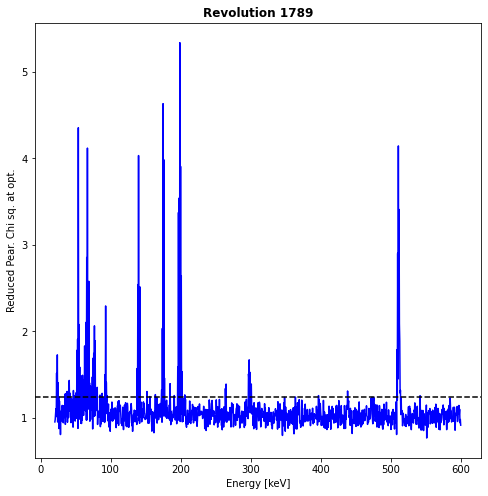

Bad Bins  [ 22.75  23.75  24.75  25.75  34.75  36.75  37.75  40.75  41.75  46.75
  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  70.75  71.75  73.75  74.75  75.75  76.75  77.75  80.75
  84.75  86.75  87.75  91.75  92.75  93.75  94.75 137.75 138.75 139.75
 140.75 141.75 151.75 155.75 163.75 172.75 173.75 174.75 175.75 176.75
 184.75 190.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 205.75
 263.75 264.75 296.75 297.25 297.75 298.75 300.25 300.75 348.25 363.75
 396.75 438.25 473.25 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 513.25 513.75 541.75]
Count  94
Tolerance  104.39999999999999
Dof  [306. 306. 306. ... 306. 306. 306.]
Width  [0.08084521 0.08084521 0.08084521 ... 0.08084521 0.08084521 0.08084521]


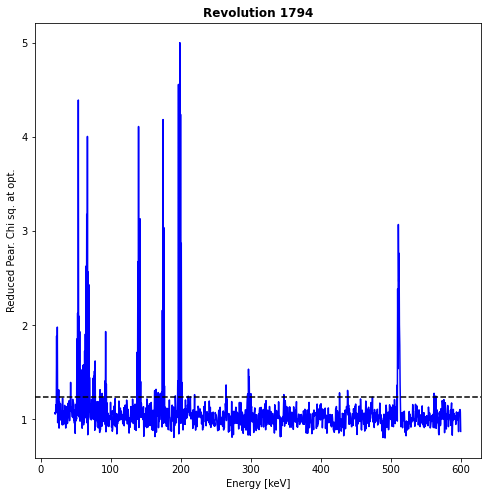

Bad Bins  [ 22.75  23.75  25.75  42.75  51.75  52.75  53.75  54.75  55.75  56.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  74.75  75.75  76.75  77.75  84.75  87.75  91.75  92.75
  93.75 137.75 138.75 139.75 140.75 141.75 142.75 162.75 164.75 167.75
 170.75 172.75 173.75 174.75 175.75 176.75 192.25 195.75 196.75 197.75
 198.75 199.75 200.75 201.75 210.75 219.75 264.75 295.25 295.75 296.75
 297.75 300.25 347.25 426.75 438.25 508.75 509.75 510.25 510.75 511.25
 511.75 512.25 512.75 513.25 561.75 564.25]
Count  76
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761505 0.07761505 ... 0.07761505 0.07761505 0.07761505]


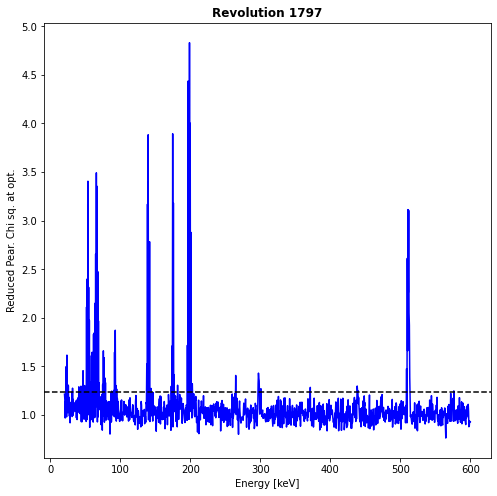

Bad Bins  [ 22.75  23.75  24.75  25.75  30.75  31.75  40.75  41.75  43.75  45.75
  46.75  47.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75
  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.25
  66.75  67.75  68.75  69.75  74.75  75.75  76.75  77.75  78.75  87.75
  90.75  91.75  92.75  93.75  94.75 137.75 138.75 139.75 140.75 141.75
 143.75 172.75 173.75 174.75 175.75 176.75 181.75 195.75 196.75 197.75
 198.75 199.75 200.75 202.75 264.75 296.75 297.25 297.75 298.25 300.75
 371.25 438.25 438.75 439.25 508.75 509.75 510.25 510.75 511.25 511.75
 512.25 512.75 513.25 576.25]
Count  84
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


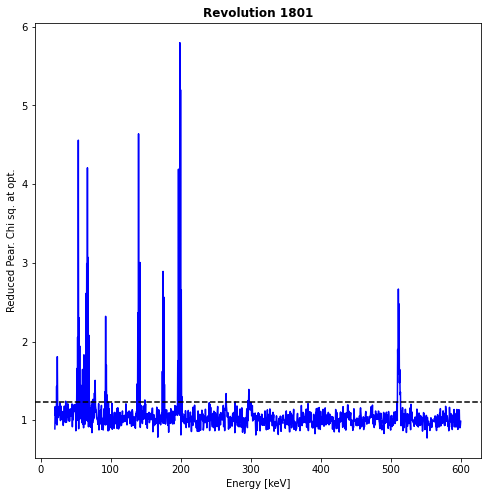

Bad Bins  [ 22.75  23.75  35.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  69.75  73.75  74.75  76.75  77.75  91.75  92.75  93.75  94.75
 137.75 138.75 139.75 140.75 141.75 148.75 173.75 174.75 175.75 176.75
 195.75 196.75 197.75 198.75 199.75 200.75 201.75 264.75 295.75 297.25
 297.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25 513.75]
Count  60
Tolerance  104.39999999999999
Dof  [62. 62. 62. ... 62. 62. 62.]
Width  [0.1796053 0.1796053 0.1796053 ... 0.1796053 0.1796053 0.1796053]


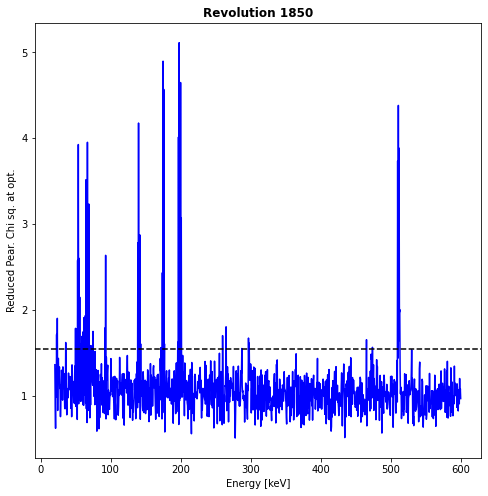

Bad Bins  [ 22.75  23.75  35.75  49.75  50.75  52.75  53.75  54.75  55.75  56.75
  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75
  68.75  71.75  74.75  91.75  92.75 138.75 139.75 140.75 141.75 142.75
 171.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75 198.75 199.75
 200.75 259.75 264.75 287.25 296.75 297.75 465.25 473.75 509.75 510.75
 511.25 511.75 512.25 512.75]
Count  54
Tolerance  104.39999999999999
Dof  [631. 631. 631. ... 631. 631. 631.]
Width  [0.05629895 0.05629895 0.05629895 ... 0.05629895 0.05629895 0.05629895]


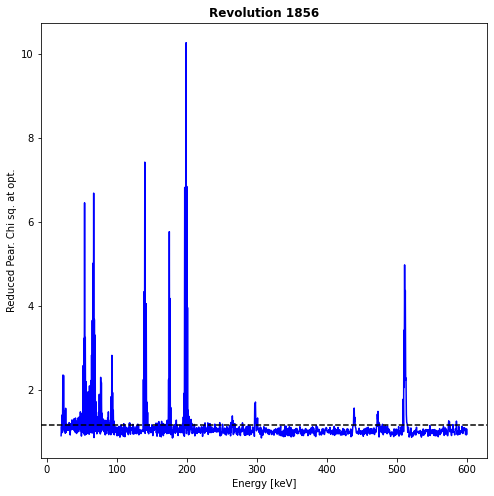

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  31.75  32.75
  33.75  35.75  36.75  38.75  39.75  40.75  41.75  42.75  44.75  45.75
  46.75  47.75  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75
  76.75  77.75  78.75  79.75  80.75  82.75  83.75  84.75  85.75  86.75
  87.75  88.75  89.75  90.75  91.75  92.75  93.75  94.75  95.75 105.75
 109.75 117.75 118.75 122.75 129.75 137.75 138.75 139.75 140.75 141.75
 142.75 143.75 145.75 149.75 155.75 156.75 157.75 159.75 161.75 163.75
 164.75 165.75 167.75 169.75 171.75 173.75 174.75 175.75 176.75 182.75
 183.75 184.75 193.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 202.75 205.75 206.75 210.25 210.75 225.75 229.75 232.75 239.75
 246.75 250.75 262.75 264.75 265.25 265.75 268.25 279.25 296.75 297.25
 297.75 298.25 298.75 299.75 300.75 438.25 438.75 439.25 439.75 470

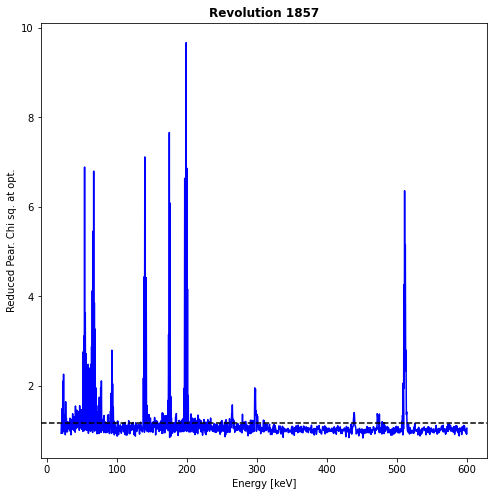

Bad Bins  [ 21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75  32.75
  33.75  34.75  35.75  36.75  37.75  38.75  39.75  40.75  41.75  42.75
  43.75  44.75  45.75  46.75  47.75  48.75  49.75  50.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  72.75
  73.75  74.75  75.75  76.75  77.75  78.75  79.75  80.75  81.75  82.75
  84.75  86.75  87.75  88.75  90.75  91.75  92.75  93.75  94.75  95.75
  96.75 100.75 101.75 111.75 116.75 121.75 122.75 126.75 133.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 145.75 146.75 147.75 148.75
 151.75 152.75 153.75 154.75 155.75 156.75 157.75 160.75 162.75 163.75
 164.75 165.75 166.75 167.75 168.75 169.75 170.75 171.75 172.75 173.75
 174.75 175.75 176.75 177.75 181.75 183.75 184.75 188.75 189.75 191.75
 192.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 202.75
 204.75 205.75 206.75 207.75 209.75 210.75 211.75 212.75 214.75 215

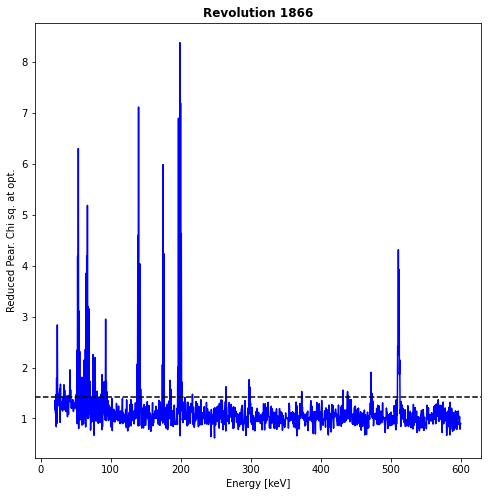

Bad Bins  [ 21.75  22.75  23.75  25.75  26.75  27.25  28.25  32.75  33.25  34.25
  35.25  37.75  40.75  41.75  42.75  50.25  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  70.75  74.75  75.75  76.75  77.75
  80.75  85.75  87.75  89.75  90.75  91.75  92.75  93.75  94.75 137.75
 138.75 139.75 140.75 141.75 142.75 173.75 174.75 175.75 176.25 184.75
 185.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 216.75 264.75
 297.75 298.75 372.75 431.75 437.75 438.25 439.25 471.75 472.75 509.75
 510.25 510.75 511.25 511.75 512.25 512.75]
Count  86
Tolerance  104.39999999999999
Dof  [177. 177. 177. ... 177. 177. 177.]
Width  [0.1062988 0.1062988 0.1062988 ... 0.1062988 0.1062988 0.1062988]


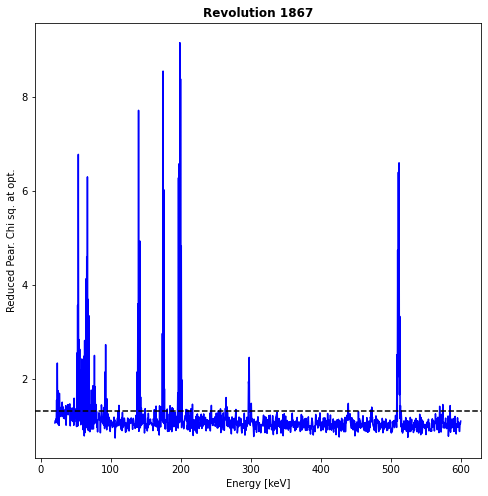

Bad Bins  [ 22.75  23.75  24.75  25.75  26.75  27.25  29.25  29.75  30.75  32.25
  34.25  35.75  37.25  38.25  38.75  39.75  40.25  40.75  41.25  41.75
  42.75  44.75  46.75  47.75  48.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75
  76.75  77.75  78.75  86.75  87.25  90.75  91.75  92.75  93.75  94.75
 111.75 137.75 138.75 139.25 139.75 140.75 141.75 142.75 143.75 149.25
 162.25 164.75 169.75 170.75 171.75 172.75 173.75 174.75 175.75 176.75
 180.75 184.75 187.75 188.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 207.75 208.75 210.75 214.75 216.75 243.75 256.75 263.75 264.75
 265.75 278.75 296.75 297.25 297.75 298.75 300.25 300.75 439.25 471.75
 472.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.75
 569.75 574.25 584.75]
Count  123
Tolerance  104.39999999999999
Dof  [216. 216. 216. ... 216. 216. 216.]
Width  [0.09622504 0.09622504 0.0

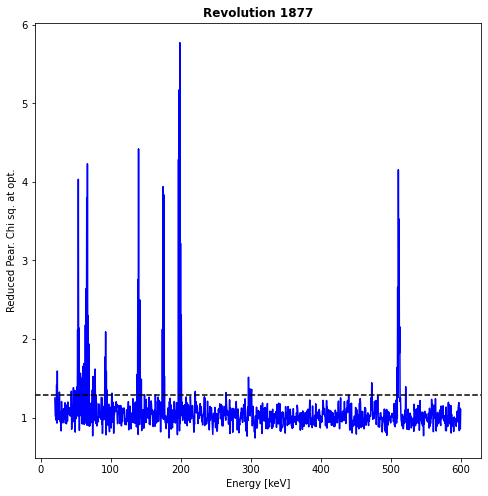

Bad Bins  [ 22.75  23.75  26.75  43.75  46.75  48.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  73.75  74.75  75.75  76.75  77.75  78.75
  91.75  92.75  93.75  94.75 101.75 137.75 138.75 139.75 140.75 141.75
 143.75 148.25 163.75 173.75 174.75 175.75 176.75 196.75 197.75 198.75
 199.75 200.75 220.75 264.75 296.75 297.75 298.25 298.75 299.75 300.75
 301.25 472.75 473.25 508.75 509.75 510.75 511.25 511.75 512.25 512.75
 521.25]
Count  71
Tolerance  104.39999999999999
Dof  [332. 332. 332. ... 332. 332. 332.]
Width  [0.07761505 0.07761505 0.07761505 ... 0.07761505 0.07761505 0.07761505]


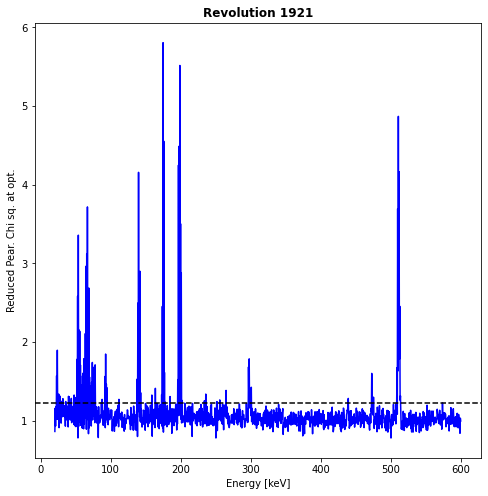

Bad Bins  [ 22.75  23.75  24.75  25.75  26.75  27.75  29.75  30.75  31.75  35.75
  39.75  40.75  43.75  47.75  49.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.25
  75.75  76.75  77.75  86.75  87.75  91.75  92.75  93.75  94.75 111.75
 137.75 138.75 139.75 140.75 141.75 142.75 158.75 163.75 172.75 173.75
 174.75 175.75 176.75 177.75 184.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 233.75 235.75 251.75 255.75 264.75 296.75 297.25 297.75
 299.75 300.75 438.75 439.25 472.75 475.25 508.75 509.75 510.25 510.75
 511.25 511.75 512.25 512.75 513.25 513.75]
Count  96
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


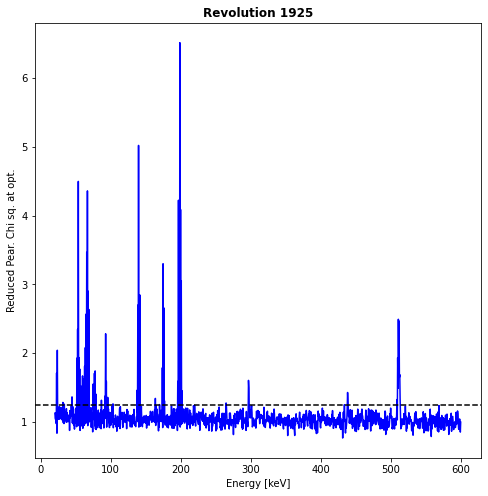

Bad Bins  [ 22.75  23.75  31.75  33.75  44.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  74.75  75.75  76.75  77.75  78.75  86.75  91.75
  92.75  93.75  94.75  95.75 103.25 137.75 138.75 139.75 140.75 141.75
 163.75 169.75 173.75 174.75 175.75 176.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 219.75 264.75 296.75 297.25 433.75 438.25 438.75
 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25]
Count  69
Tolerance  104.39999999999999
Dof  [670. 670. 670. ... 670. 670. 670.]
Width  [0.05463584 0.05463584 0.05463584 ... 0.05463584 0.05463584 0.05463584]


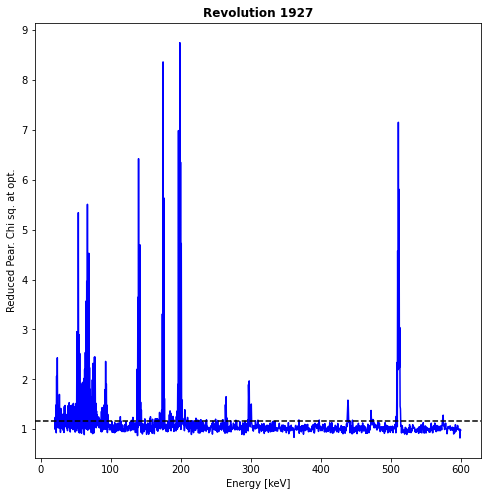

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75
  30.75  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75
  40.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.25  48.75
  49.75  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75
  59.75  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75
  69.75  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75
  79.75  80.75  81.75  82.75  83.75  84.75  85.75  86.75  87.75  88.75
  90.75  91.75  92.75  93.75  94.75  95.75 113.75 130.75 131.75 137.75
 138.75 139.75 140.75 141.75 142.75 143.75 148.75 155.75 156.75 159.75
 163.75 165.75 166.75 167.75 168.75 169.75 170.75 171.75 172.75 173.75
 174.75 175.75 176.75 183.75 184.75 185.75 188.75 189.75 193.75 194.75
 195.75 196.75 197.25 197.75 198.75 199.25 199.75 200.75 201.75 202.25
 202.75 203.25 204.75 205.75 206.75 209.75 210.75 215.75 217.75 221.75
 222.75 225.75 228.75 236.75 249.75 252.75 259.75 260.75 263.75 264

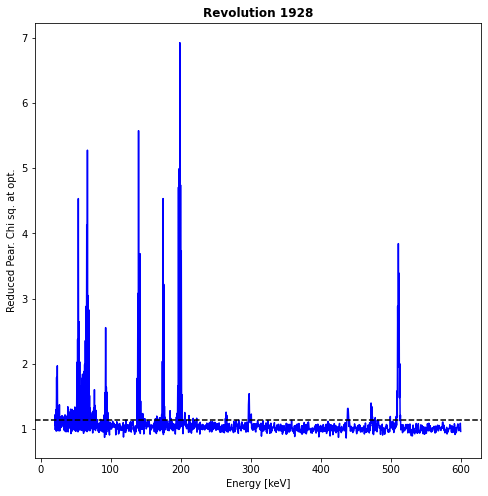

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75
  30.75  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75
  40.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  80.75  85.75
  90.75  91.75  92.75  93.75  94.75  95.75 121.75 137.75 138.75 139.75
 140.75 141.75 142.75 143.75 145.75 146.75 148.75 163.75 165.75 166.75
 169.75 170.75 172.75 173.75 174.75 175.75 176.75 177.75 184.75 185.75
 193.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 202.75
 205.75 207.75 211.75 212.75 217.75 222.75 263.75 264.75 265.75 282.75
 296.75 297.25 297.75 298.25 298.75 299.75 300.75 358.25 437.25 437.75
 438.25 438.75 439.25 439.75 440.75 471.75 472.75 473.75 474.75 477.75
 480.75 499.25 507.75 508.75 509.25 509.75 510.25 510.75 511.25 511

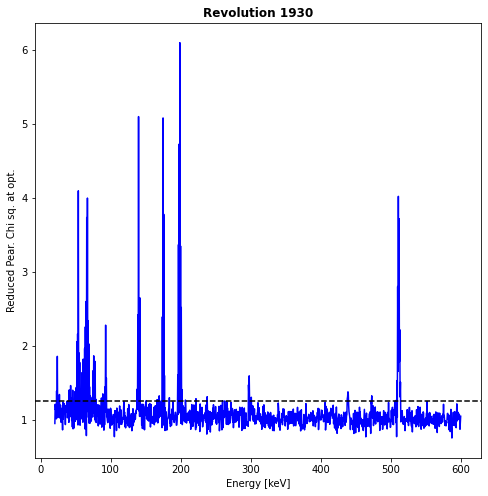

Bad Bins  [ 22.75  23.75  26.75  40.75  42.75  43.75  45.75  48.75  49.75  50.75
  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75
  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75
  71.75  73.75  74.75  75.75  76.75  77.75  78.75  86.75  88.75  91.75
  92.75  93.75 137.75 138.75 139.75 140.75 141.75 150.75 166.25 169.25
 173.75 174.75 175.75 176.75 183.75 195.75 196.75 197.75 198.75 199.75
 200.75 201.75 206.75 221.75 237.75 259.75 262.75 296.75 297.25 297.75
 298.25 299.75 300.75 437.75 438.25 438.75 439.25 472.75 507.75 508.75
 509.75 510.25 510.75 511.25 511.75 512.25 512.75 513.25 513.75]
Count  89
Tolerance  104.39999999999999
Dof  [267. 267. 267. ... 267. 267. 267.]
Width  [0.08654846 0.08654846 0.08654846 ... 0.08654846 0.08654846 0.08654846]


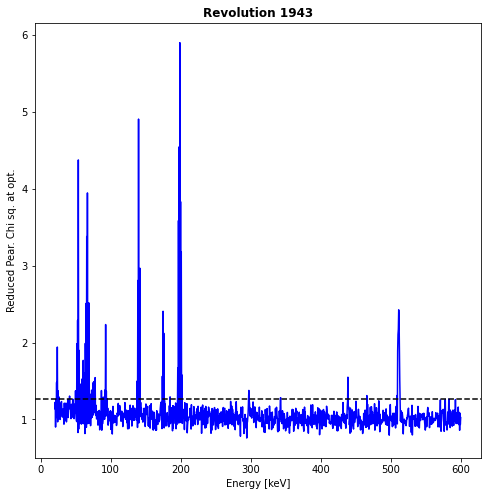

Bad Bins  [ 21.75  22.75  23.75  24.75  26.25  39.75  41.25  45.75  49.75  51.75
  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75
  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  72.75
  73.75  74.75  75.75  76.75  77.75  86.75  87.75  90.75  91.75  92.75
  93.75  94.75 137.75 138.75 139.75 140.75 141.75 173.75 174.75 175.75
 184.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 297.25 342.25
 342.75 438.75 465.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75 582.75]
Count  72
Tolerance  104.39999999999999
Dof  [306. 306. 306. ... 306. 306. 306.]
Width  [0.08084521 0.08084521 0.08084521 ... 0.08084521 0.08084521 0.08084521]


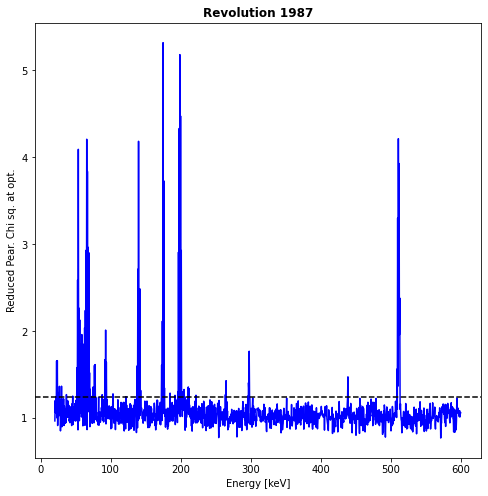

Bad Bins  [ 21.75  22.75  23.75  25.75  26.75  29.75  36.75  45.75  51.75  52.75
  53.75  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75
  63.75  64.75  65.75  66.75  67.75  68.75  69.75  70.75  71.75  74.75
  75.75  76.75  77.75  87.75  91.75  92.75  93.75 103.25 121.75 137.75
 138.75 139.75 140.75 141.75 142.75 172.75 173.75 174.75 175.75 176.75
 184.75 191.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 202.75
 204.75 205.75 210.75 211.75 221.75 263.75 264.75 295.75 296.75 297.25
 297.75 298.25 438.75 508.75 509.75 510.25 510.75 511.25 511.75 512.25
 512.75]
Count  81
Tolerance  104.39999999999999
Dof  [319. 319. 319. ... 319. 319. 319.]
Width  [0.07918076 0.07918076 0.07918076 ... 0.07918076 0.07918076 0.07918076]


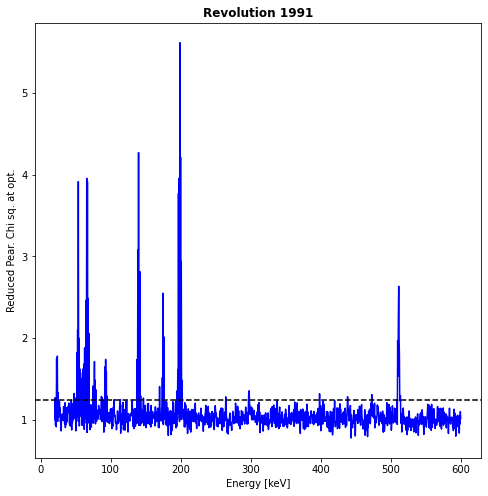

Bad Bins  [ 20.75  22.75  23.75  24.75  43.75  47.75  48.75  51.75  52.75  53.75
  54.75  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75
  64.75  65.75  66.75  67.75  68.75  74.75  75.75  76.75  77.75  78.75
  86.75  87.75  88.75  91.75  92.75  93.75  94.75 104.75 113.75 130.75
 137.75 138.75 139.75 140.75 141.75 142.75 146.75 169.75 173.75 174.75
 175.75 193.75 194.75 195.75 196.75 197.25 197.75 198.75 199.75 200.75
 201.75 264.25 296.75 297.25 297.75 398.25 438.25 472.75 508.75 509.75
 510.25 510.75 511.25 511.75 512.25 513.25 513.75]
Count  77
Tolerance  104.39999999999999
Dof  [345. 345. 345. ... 345. 345. 345.]
Width  [0.0761387 0.0761387 0.0761387 ... 0.0761387 0.0761387 0.0761387]


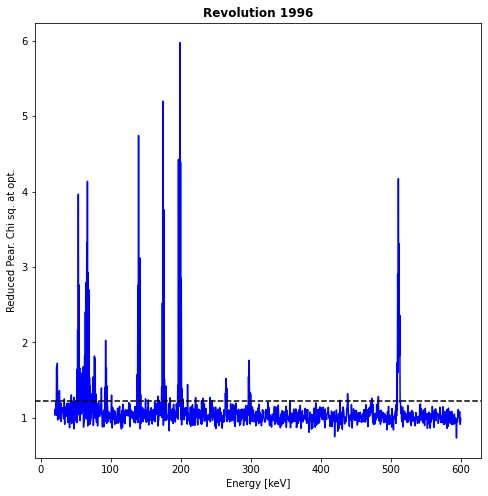

Bad Bins  [ 22.75  23.75  26.75  33.75  43.75  47.75  51.75  52.75  53.75  54.75
  55.75  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75
  65.75  66.75  67.75  68.75  69.75  70.75  72.75  73.75  74.75  75.75
  76.75  77.75  78.75  86.75  91.75  92.75  93.75  94.75 101.25 137.75
 138.75 139.75 140.75 141.75 142.75 149.75 153.75 167.75 168.75 172.75
 173.75 174.75 175.75 176.75 178.75 184.75 195.75 196.75 197.75 198.75
 199.75 200.75 201.75 203.25 209.75 221.25 231.75 241.75 263.75 264.75
 265.75 296.75 297.25 297.75 298.75 299.75 355.75 427.25 438.25 438.75
 472.75 482.25 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75
 513.75]
Count  91
Tolerance  104.39999999999999
Dof  [657. 657. 657. ... 657. 657. 657.]
Width  [0.05517373 0.05517373 0.05517373 ... 0.05517373 0.05517373 0.05517373]


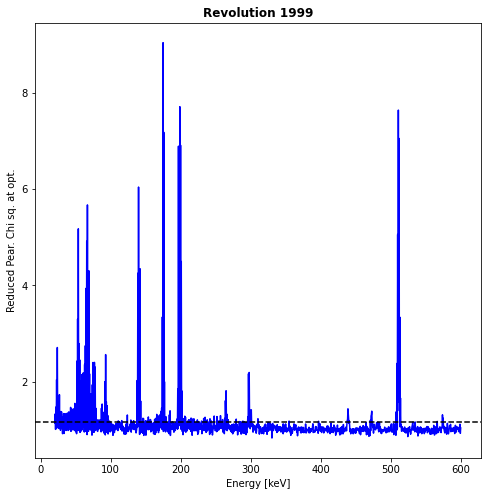

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  27.75  28.75  29.75
  30.75  31.75  32.75  33.75  34.75  35.75  36.75  37.75  38.75  39.75
  40.75  41.75  42.75  43.75  44.75  45.75  46.75  47.75  48.75  49.75
  50.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  70.75  71.75  72.75  73.75  74.75  75.75  76.75  77.75  78.75  79.75
  80.75  81.75  82.75  84.75  85.75  86.75  87.75  88.75  89.75  90.75
  91.75  92.75  93.75  94.75  95.75  96.75  98.75 110.75 112.75 115.75
 123.75 128.75 132.75 137.75 138.75 139.75 140.75 141.75 142.75 145.75
 146.75 149.75 150.75 151.75 153.75 154.75 155.75 156.75 157.75 162.75
 163.75 164.75 165.75 166.75 167.75 168.75 169.75 170.75 171.75 172.75
 173.75 174.75 175.75 176.75 178.75 183.75 184.75 187.75 188.75 193.75
 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 202.75 203.75
 204.75 205.75 206.75 210.75 211.75 214.75 215.75 217.75 218.75 223

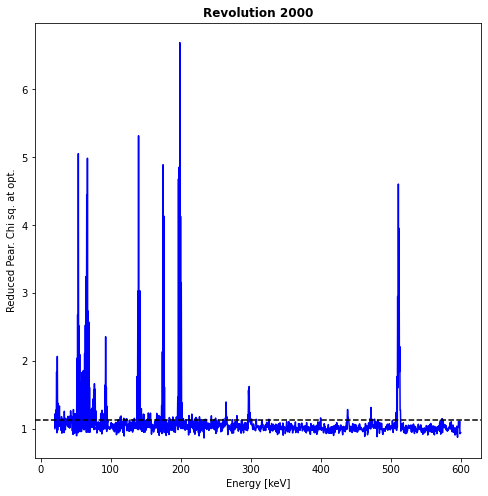

Bad Bins  [ 20.75  21.75  22.75  23.75  24.75  25.75  26.75  29.75  30.75  32.75
  33.75  35.75  38.75  39.75  40.75  41.75  42.75  43.75  44.75  45.75
  46.75  47.75  48.75  49.75  50.75  51.75  52.75  53.75  54.75  55.75
  56.75  57.75  58.75  59.75  60.75  61.75  62.75  63.75  64.75  65.75
  66.75  67.75  68.75  69.75  70.75  71.75  72.75  73.75  74.75  75.75
  76.75  77.75  78.75  85.75  86.75  87.75  88.75  89.75  90.75  91.75
  92.75  93.75  94.75 110.75 113.75 114.75 118.75 119.75 122.75 133.75
 137.75 138.75 139.75 140.75 141.75 142.75 143.75 145.75 146.75 147.75
 152.75 153.75 154.75 155.75 156.75 164.75 165.75 166.75 167.75 168.75
 170.75 171.75 172.75 173.75 174.75 175.75 176.75 183.75 184.75 188.75
 193.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75 201.75 203.75
 211.75 215.75 216.75 220.75 221.75 222.75 226.75 228.75 233.75 235.75
 243.75 247.75 249.75 260.75 263.75 264.75 265.25 265.75 273.75 280.25
 295.75 296.75 297.25 297.75 298.75 299.25 299.75 301.25 307.75 325

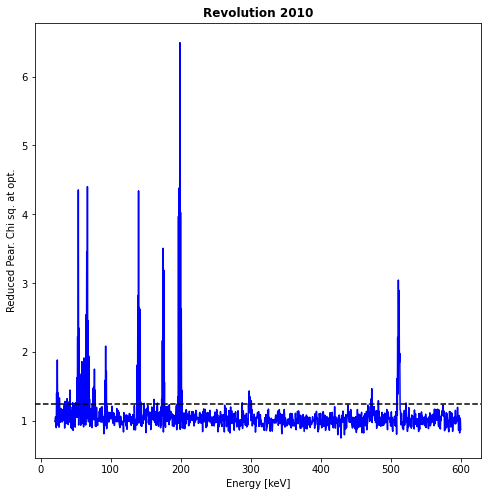

Bad Bins  [ 22.75  23.75  24.75  26.75  34.75  37.75  40.75  41.75  45.75  48.75
  49.75  51.75  52.75  53.75  54.75  55.75  56.75  57.75  58.75  59.75
  60.75  61.75  62.75  63.75  64.75  65.75  66.75  67.75  68.75  69.75
  73.75  74.75  75.75  76.75  77.75  91.75  92.75  93.75 137.75 138.75
 139.75 140.75 141.75 142.75 143.75 147.75 161.75 166.75 172.75 173.75
 174.75 175.75 176.75 194.75 195.75 196.75 197.75 198.75 199.75 200.75
 201.75 287.75 296.75 297.75 298.25 298.75 299.75 300.75 471.75 472.75
 482.25 508.75 509.75 510.25 510.75 511.25 511.75 512.25 512.75 521.75]
Count  80
Tolerance  104.39999999999999


In [5]:
for i in range(len(rev)):
    get_bad_rev(rev[i])

In [6]:
print('Good Revolutions: ', good_rev)
print('Bad Revolutions: ', bad_rev)

Good Revolutions:  [43, 44, 45, 47, 51, 55, 58, 102, 123, 124, 125, 126, 177, 181, 182, 225, 229, 239, 242, 300, 301, 308, 352, 365, 372, 412, 420, 428, 464, 468, 483, 541, 662, 728, 836, 902, 917, 970, 1023, 1024, 1026, 1028, 1140, 1141, 1214, 1269, 1278, 1342, 1444, 1447, 1456, 1466, 1468, 1504, 1505, 1520, 1524, 1528, 1577, 1581, 1593, 1597, 1644, 1648, 1658, 1664, 1667, 1719, 1728, 1733, 1736, 1781, 1789, 1794, 1797, 1801, 1850, 1866, 1877, 1921, 1925, 1930, 1943, 1987, 1991, 1996, 2010]
Bad Revolutions:  [422, 605, 665, 666, 727, 774, 834, 835, 839, 903, 966, 967, 968, 1019, 1021, 1022, 1027, 1089, 1096, 1221, 1268, 1327, 1328, 1387, 1461, 1462, 1515, 1516, 1598, 1599, 1662, 1723, 1724, 1784, 1785, 1856, 1857, 1867, 1927, 1928, 1999, 2000]
